## Problem Statement

<font color=blue> **Building a predictive model that predicts the audit risk of a firm in the form of a score and this score can in turn be used to classify a firm as fraudulent or otherwise.** </font>


## Data Source

<font color=blue> **The dataset for this project and the problem statement are inspired by a case study published in the Applied Artificial Intelligence Journal. They collected this data from CAG of India. Comptroller and Auditor General (CAG) of India is an independent constitutional body of India. It is an authority that audits receipts and expenditure of all the firms that are financed by the government of India. While maintaining the secrecy of the data, exhaustive one year(2015 - 2016) nonconfidential data of firms is collected from the Auditor General Office (AGO) of CAG. There are total 777 firms from 46 different cities of a state that are listed by the auditors for targeting the next field-audit work. The target offices are listed from 14 different sectors.** </font>

## Data Description

#### The dataset was made available through 2 csv files – audit_risk and trial. The audit_risk has 27 columns and trial has 18 columns. The 27 columns in audit_risk file are the following:
#### Sector_Score – Historical risk score value for each target sector
#### LOCATION_ID – Unique ID of the city or province
#### PARA_A - Discrepancy found in the planned expenditure of inspection and summary report A in Rs (in crore)
#### SCORE_A, RISK_A – These columns can be derived from the PARA_A
#### PARA_B - Discrepancy found in the unplanned expenditure of inspection and summary report B in Rs (in crore)
#### SCORE_B, RISK_B - These columns can be derived from the PARA_B. TOTAL - Total amount of discrepancy found in other reports Rs (in crore)
#### numbers - Historical discrepancy score
#### Score_B.1, Risk_C - These columns can be derived from the numbers
#### Money_Value - Amount of money involved in misstatements in the past audits
#### SCORE_MV, Risk_D - These columns can be derived from the Money_Value
#### District_Loss - Historical risk score of a district in the last 10 years
#### PROB – probability of District_Loss
#### Risk_E – It is the product of District_Loss and PROB
#### History - Average historical loss suffered by firm in the last 10 years
#### Prob – Probability of Historical Loss score
#### Risk_F – It is the product of History and prob
#### Score – It is a deciding factor in classifying a firm as ‘Fraud’ or ‘Not Fraud’, In the trial file, if the score is less than or equal to 2, the firm is labelled ‘Not Fraud’, if it is greater than 2, it is labelled ‘Fraud’
#### Inherent_Risk - the risk present due to the discrepancies present in the transactions
#### CONTROL_RISK - the risk due to the discrepancies which are left undetected by an internal control system
#### Detection_Risk - risk of discrepancies present in the firm which are not even detected by the audit procedures
#### Audit_Risk – It is the product of Inherent, control and detection risks
#### Risk – It is dependent on Audit_Risk, If the Audit_Risk is less than or equal to 1, the firm is labelled ‘Not Fraud’ and if it is greater than 1, it is labelled ‘Fraud’.

#### The Score_A in Audit_Risk multiplied by 10 is the Score_A in trial. The same applies to Score_B. Audit_Risk dataset contains Risk_A(a derivative of PARA_A and Score_A) and Risk_B(a derivative of PARA_B and Score_B) which are not present in trial. TOTAL and numbers columns are identical in Audit_Risk and trial. Score_B.1 multiplied by 10 is the Marks column in trial. Audit_Risk has an extra column Risk_C( a derivative of numbers and Score_B.1) compared to trial. Score_MV in Audit_Risk multiplied by 10 is the Money_Marks column in trial dataset. Risk_D( a derivative of Money_Value and Score_MV) is absent in trial. PROB(probability of district loss score) in Audit_Risk multiplied by 10 is the Loss_Score in trial. prob(probability of historical loss score) in Audit_Risk multiplied by 10 is the History_Score in trial. Score is exactly identical in both Audit_risk and trial datasets. Risk column in trial is calculated based on Score value. The discrepancy in the Risk columns of Audit_Risk and trial datasets arises from the fact that Audit_Risk dataset uses Audit_Risk column(Product of Inherent_Risk, Controlled_Risk and Detection_Risk columns) to classify a firm as Fraud or otherwise.


## Technologies used

<font color=blue>**Python**</font>

Pandas, Numpy, mglearn, sklearn, matplotlib, Seaborn, TensorFlow, Keras

### Step 1: Importing data and basic machine learning libraries

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 50)

In [2]:
Audit_Risk = pd.read_csv('audit_risk.csv') #Risk in Audit_Risk should be used for classification
Trials = pd.read_csv('trial.csv')

In [3]:
display(Audit_Risk.shape)
display(Audit_Risk.head())
display(Trials.shape)
display(Trials.head())
display(Audit_Risk['LOCATION_ID'].unique())

(776, 27)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


(776, 18)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

### Checking Missing Values

#### Here, we are checking missing values in DataFrames Audit_Risk and Risk respectively. We can clearly see that there is only one missing value present in the Money_Value column in both DataFrames.

In [4]:
#Checking the null values in Audit_Risk and Trials
Audit_Risk.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [5]:
len(Audit_Risk) - Audit_Risk.count()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [6]:
Trials.isnull().any()

Sector_score     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
PARA_B           False
SCORE_B          False
TOTAL            False
numbers          False
Marks            False
Money_Value       True
MONEY_Marks      False
District         False
Loss             False
LOSS_SCORE       False
History          False
History_score    False
Score            False
Risk             False
dtype: bool

In [7]:
len(Trials) - Trials.count()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

### Number of Unique values in each column

#### As we have to merge two dataframes for regression and classification task so here we are looking for number of unique values in each column so we can merge dataframes using that common column.
#### Clearly, there is no column which has a number of unique value equals to our number of records of the dataframe i.e. 776 hence we can not merge two dataframes just using single column and we have to think of combining multiple columns while merging the dataframes.

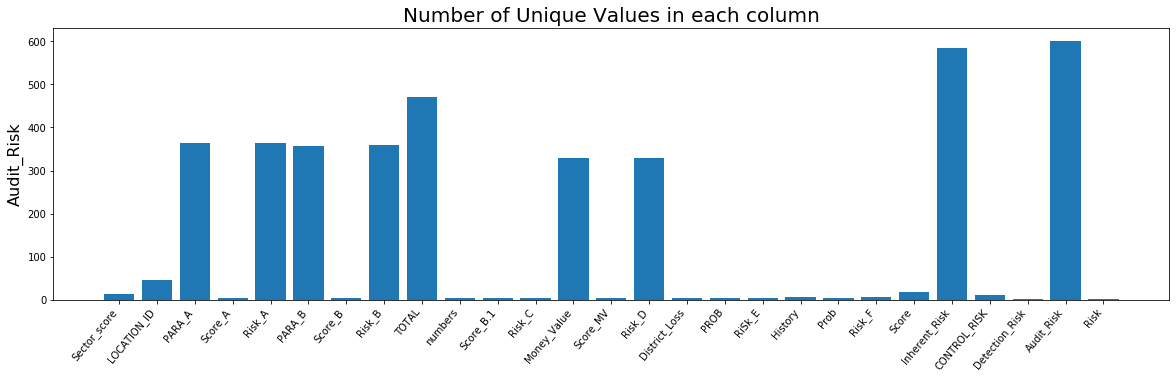

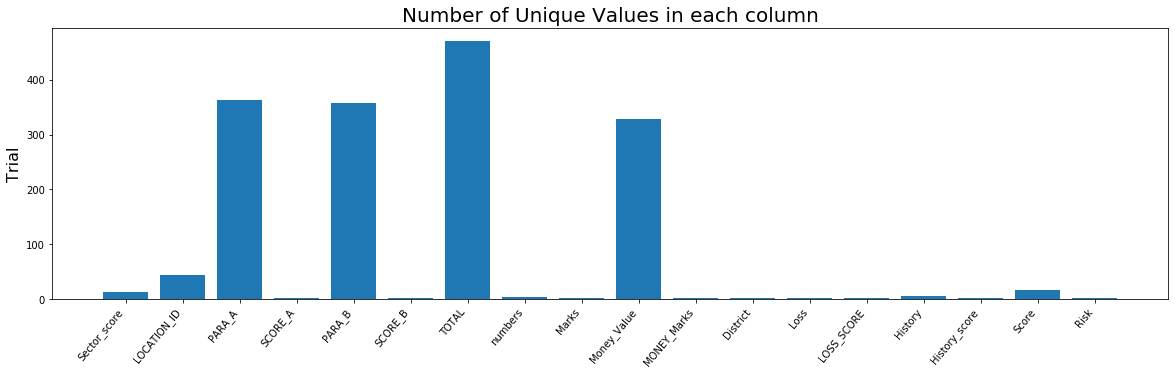

In [8]:
y_audit_risk=[]
x_audit_risk=[]
for i in range(len(Audit_Risk.nunique().index)):
    y_audit_risk.append(Audit_Risk.nunique().index[i])
    x_audit_risk.append(Audit_Risk.nunique()[i])
    
y_trial=[]
x_trial=[]
for i in range(len(Trials.nunique().index)):
    y_trial.append(Trials.nunique().index[i])
    x_trial.append(Trials.nunique()[i])

plt.figure(figsize=(20,5))

plt.bar(y_audit_risk,x_audit_risk, align='center', alpha=1)
plt.ylabel('Audit_Risk', Fontsize= 16)
plt.title('Number of Unique Values in each column',fontsize=20)
plt.xticks(rotation=50, ha="right")

plt.show()

plt.figure(figsize=(20,5))

plt.bar(y_trial,x_trial, align='center', alpha=1)
plt.ylabel('Trial', Fontsize= 16)
plt.title('Number of Unique Values in each column',fontsize=20)
plt.xticks(rotation=50, ha="right")

plt.show()



In [9]:
Audit_Risk.columns & Trials.columns #extracting common columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'History', 'Score', 'Risk'],
      dtype='object')

### Find Duplicate Rows

In [10]:
Audit_Risk[Audit_Risk.duplicated() == True]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
265,2.72,15,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
474,1.85,16,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
600,55.57,8,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
659,55.57,5,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
679,55.57,9,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
695,55.57,12,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
696,55.57,12,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
704,55.57,8,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
715,55.57,27,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
716,55.57,2,0.00,0.2,0.000,0.0,0.2,0.00,0.00,5.0,0.2,1.0,0.0,0.2,0.0,6,0.2,1.2,0,0.2,0.0,2.4,2.200,1.2,0.5,1.3200,1


In [11]:
Trials[Trials.duplicated() == True]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
265,2.72,15,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
474,1.85,16,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
600,55.57,8,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
659,55.57,5,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
679,55.57,9,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
695,55.57,12,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
696,55.57,12,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
704,55.57,8,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
715,55.57,27,0.00,2,0.0,2,0.00,5.0,2,0.0,2,2,0,2,0,2,2.0,0
716,55.57,2,0.00,2,0.0,2,0.00,5.0,2,0.0,2,6,0,2,0,2,2.4,1


### Remove Duplicate Rows

#### While training a supervised learning algorithm, the usual assumptions are that:
####      Data points are independent and identically distributed.
####      Training and testing data is sampled from the same distribution.
In light of these assumptions, we are removing duplicate records from both daframes.

In [12]:
Audit_Risk=Audit_Risk.drop_duplicates()
display(Audit_Risk.shape)
Trials=Trials.drop_duplicates()
display(Trials.shape)

(763, 27)

(763, 18)

In [13]:
pd.set_option('display.max_rows', 780)

In [14]:
Trials = Trials.rename(columns={'Risk': 'Risk_trial'})

In [15]:
Audit_Risk.columns & Trials.columns #extracting common columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'History', 'Score'],
      dtype='object')

In [16]:
#merging the Audit_Risk and Trials on common columns
merged = Audit_Risk.merge(Trials, how = 'inner', on = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'History', 'Score'], sort = False)
merged.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
SCORE_A             3
SCORE_B             3
Marks               3
MONEY_Marks         3
District            3
Loss                3
LOSS_SCORE          3
History_score       3
Risk_trial          2
dtype: int64

### Data Cleaning

In [17]:
merged = merged.drop(['Risk_trial'], axis = 1)
#Here, I deleted the 'Risk_trial' column which as originally 'Risk' from 'trial.csv' as it had some values that were different from the 'Risk' column from 'audit_risk.csv'.
#The paper states that the values of 'Audit_Risk' being greater or equal to 1 are classified as 1 and 0 otherwise.

In [18]:
merged.shape

(763, 35)

In [19]:
#We can see there are three LOCATION_IDs to those numeric values are not assigned so we are assigning three missing
#numeric values 10,26 and 45 to those LOCATION_IDs.
print(merged['LOCATION_ID'].unique())

['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 'LOHARU' 'NUH' 'SAFIDON' '43' '44'
 '17']


In [20]:
merged['LOCATION_ID']=merged['LOCATION_ID'].replace('LOHARU',10)
merged['LOCATION_ID']=merged['LOCATION_ID'].replace('NUH',26)
merged['LOCATION_ID']=merged['LOCATION_ID'].replace('SAFIDON',45)
#merged['LOCATION_ID']=(merged['LOCATION_ID']).astype(float)

In [21]:
merged['Risk'].replace(0,"Not Fraud",inplace = True)
merged['Risk'].replace(1,"Fraud",inplace = True)

In [22]:
merged.shape

(763, 35)

In [23]:
#Imputing the missing value in the Money_Value column
merged['Money_Value'] = merged['Money_Value'].fillna(merged['Money_Value'].mean())

In [24]:
#Checking if the null values in Money_Value are replaced
merged.info()
#merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 35 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_B.1         763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_MV          763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON

In [25]:
#Number of unique values in each columns
for i in range(0, len(merged.columns)):
    print(merged.columns[i], ":", merged.iloc[:,i].nunique())

Sector_score : 13
LOCATION_ID : 45
PARA_A : 363
Score_A : 3
Risk_A : 363
PARA_B : 358
Score_B : 3
Risk_B : 360
TOTAL : 471
numbers : 5
Score_B.1 : 3
Risk_C : 5
Money_Value : 329
Score_MV : 3
Risk_D : 328
District_Loss : 3
PROB : 3
RiSk_E : 5
History : 7
Prob : 3
Risk_F : 7
Score : 17
Inherent_Risk : 584
CONTROL_RISK : 11
Detection_Risk : 1
Audit_Risk : 601
Risk : 2
SCORE_A : 3
SCORE_B : 3
Marks : 3
MONEY_Marks : 3
District : 3
Loss : 3
LOSS_SCORE : 3
History_score : 3


In [26]:
merged['Detection_Risk']

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
5      0.5
6      0.5
7      0.5
8      0.5
9      0.5
10     0.5
11     0.5
12     0.5
13     0.5
14     0.5
15     0.5
16     0.5
17     0.5
18     0.5
19     0.5
20     0.5
21     0.5
22     0.5
23     0.5
24     0.5
25     0.5
26     0.5
27     0.5
28     0.5
29     0.5
30     0.5
31     0.5
32     0.5
33     0.5
34     0.5
35     0.5
36     0.5
37     0.5
38     0.5
39     0.5
40     0.5
41     0.5
42     0.5
43     0.5
44     0.5
45     0.5
46     0.5
47     0.5
48     0.5
49     0.5
50     0.5
51     0.5
52     0.5
53     0.5
54     0.5
55     0.5
56     0.5
57     0.5
58     0.5
59     0.5
60     0.5
61     0.5
62     0.5
63     0.5
64     0.5
65     0.5
66     0.5
67     0.5
68     0.5
69     0.5
70     0.5
71     0.5
72     0.5
73     0.5
74     0.5
75     0.5
76     0.5
77     0.5
78     0.5
79     0.5
80     0.5
81     0.5
82     0.5
83     0.5
84     0.5
85     0.5
86     0.5
87     0.5
88     0.5
89     0.5
90     0.5

In [27]:
#Detection_Risk has the same value across all observations, so dropping this column

merged = merged.drop(['Detection_Risk'], axis = 1)
merged.shape

(763, 34)

In [28]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 34 columns):
Sector_score     763 non-null float64
LOCATION_ID      763 non-null object
PARA_A           763 non-null float64
Score_A          763 non-null float64
Risk_A           763 non-null float64
PARA_B           763 non-null float64
Score_B          763 non-null float64
Risk_B           763 non-null float64
TOTAL            763 non-null float64
numbers          763 non-null float64
Score_B.1        763 non-null float64
Risk_C           763 non-null float64
Money_Value      763 non-null float64
Score_MV         763 non-null float64
Risk_D           763 non-null float64
District_Loss    763 non-null int64
PROB             763 non-null float64
RiSk_E           763 non-null float64
History          763 non-null int64
Prob             763 non-null float64
Risk_F           763 non-null float64
Score            763 non-null float64
Inherent_Risk    763 non-null float64
CONTROL_RISK     763 non-n

## Univariate Analysis

### Continuous Variables

#### Statistical

In [29]:
merged.describe()


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,19.721311,2.491298,0.353866,1.373919,10.983474,0.315072,6.441822,13.442532,5.068807,0.224115,1.155570,14.378824,0.292529,8.406261,2.508519,0.206291,0.520052,0.106160,0.217038,0.054522,2.714024,17.956720,0.574574,7.284109,3.538663,3.150721,2.241153,2.925295,2.508519,0.030144,2.062910,2.170380
std,24.132399,5.718259,0.174398,3.465152,50.489113,0.170597,30.316831,51.719679,0.266546,0.080974,0.541607,67.103095,0.160656,40.295660,1.230994,0.037818,0.291352,0.535365,0.068529,0.308352,0.861574,55.163921,0.447253,38.985618,1.743985,1.705967,0.809740,1.606557,1.230994,0.185804,0.378178,0.685288
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.280000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.260000,0.200000,0.052000,0.000000,0.200000,0.000000,0.590000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.593000,0.400000,0.318600,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.900000,0.200000,0.180000,0.440000,0.200000,0.088000,1.420000,5.000000,0.200000,1.000000,0.110000,0.200000,0.022000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.238000,0.400000,0.590000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.515000,0.600000,1.509000,4.365000,0.400000,2.104000,7.990000,5.000000,0.200000,1.000000,6.040000,0.400000,2.364000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.400000,10.960000,0.400000,3.452800,6.000000,4.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,961.514400,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [30]:
merged.mode() 

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,55.57,8,0.0,0.2,0.0,0.0,0.2,0.0,0.0,5.0,0.2,1.0,0.0,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.4,0.4,0.28,Not Fraud,2,2,2,2,2,0,2,2


#### Visual

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

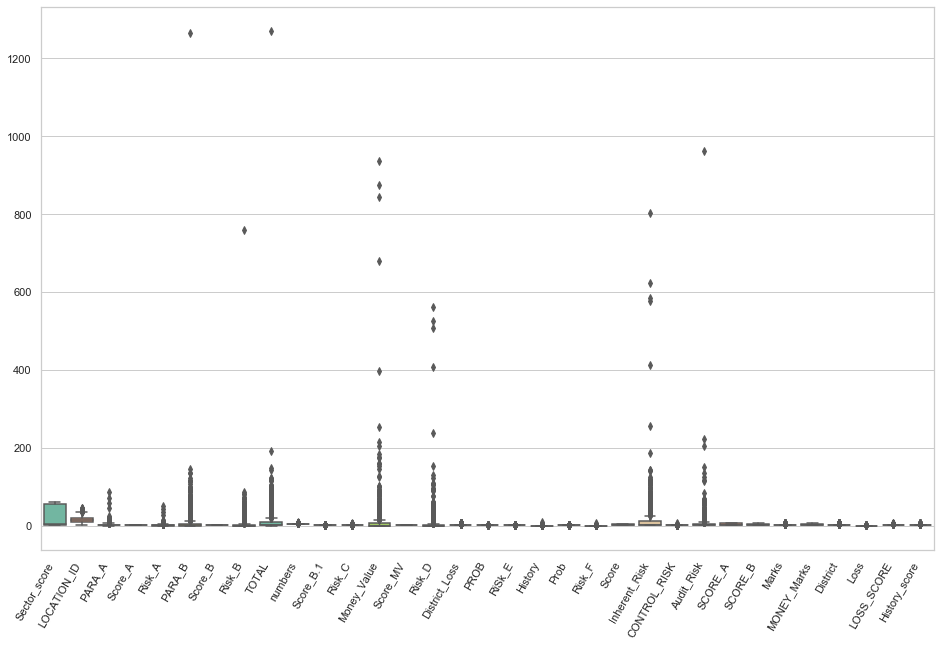

In [31]:
plt.figure(figsize=(16,10))

sns.set(style="whitegrid")
ax = sns.boxplot(data=merged, orient="v", palette="Set2")
plt.xticks(rotation=60, ha="right")

/Volumes/MacintoshHD/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


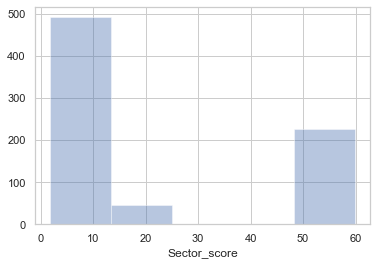

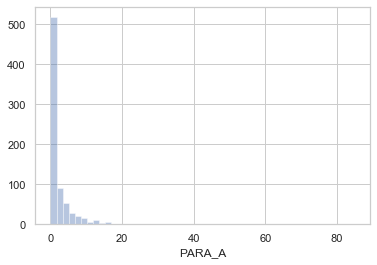

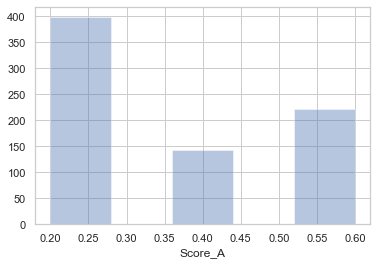

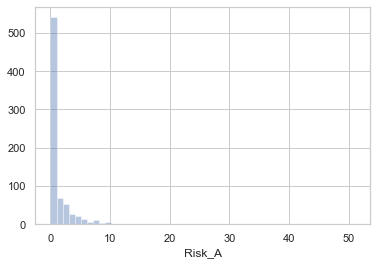

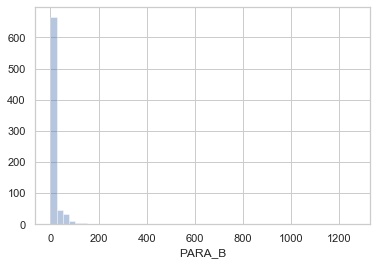

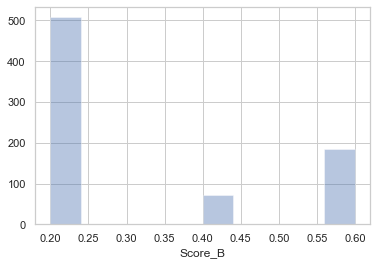

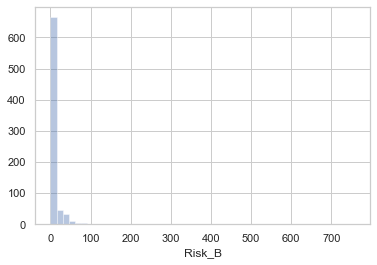

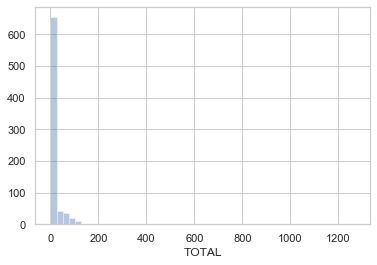

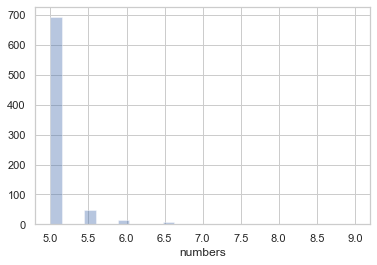

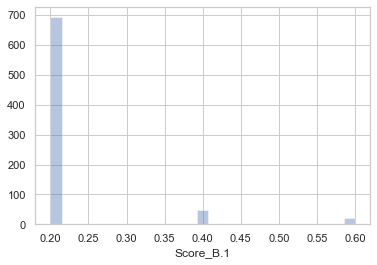

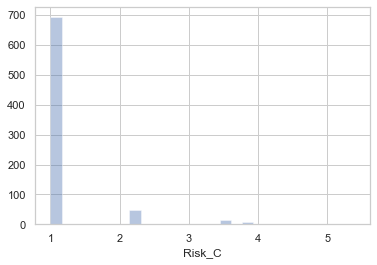

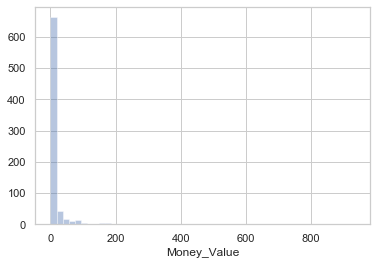

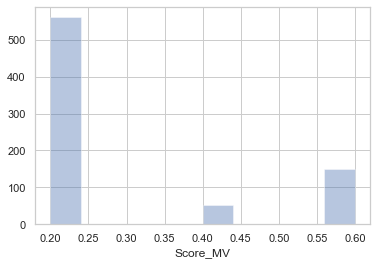

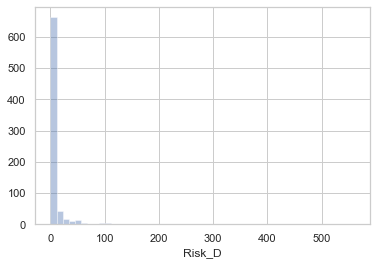

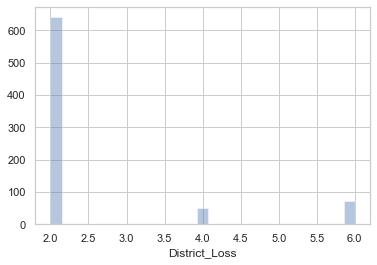

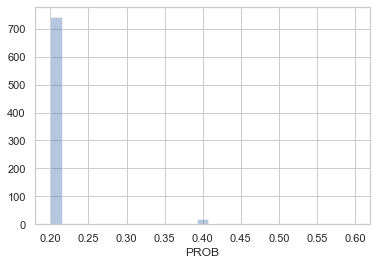

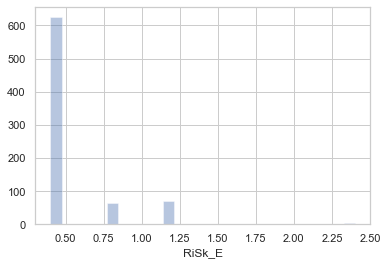

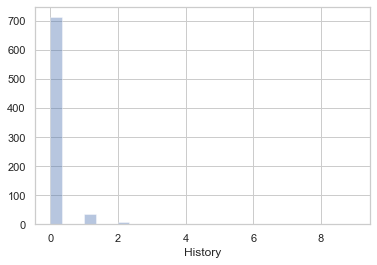

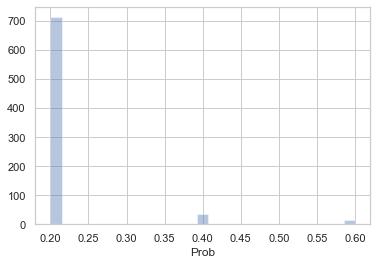

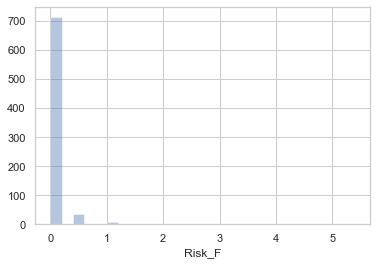

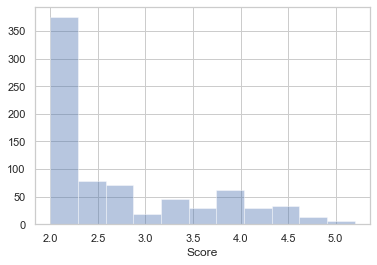

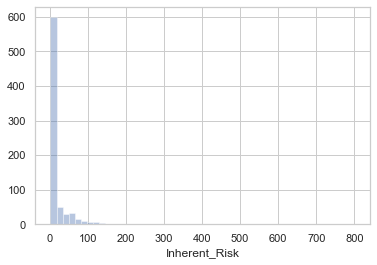

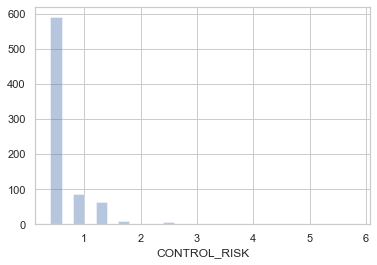

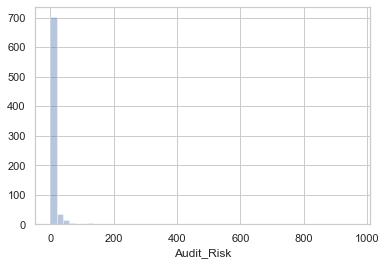

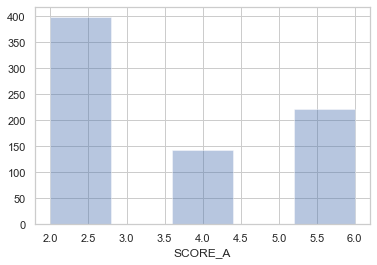

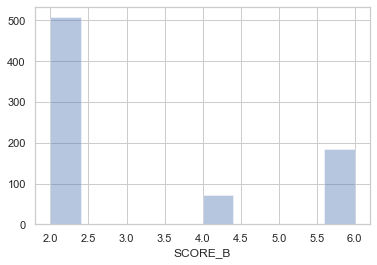

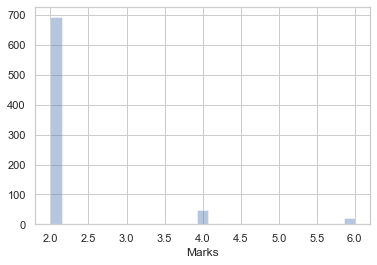

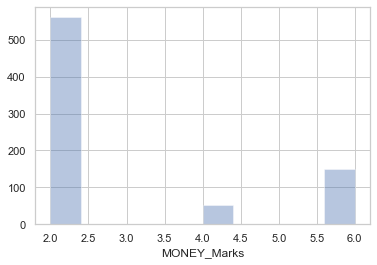

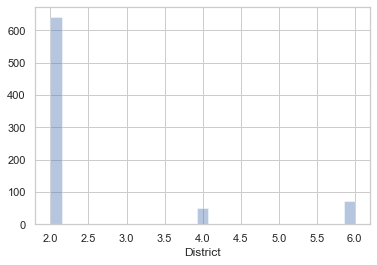

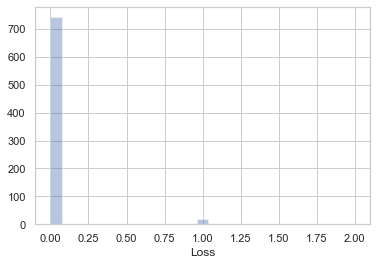

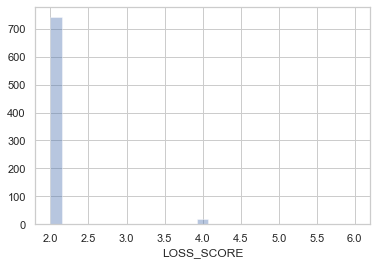

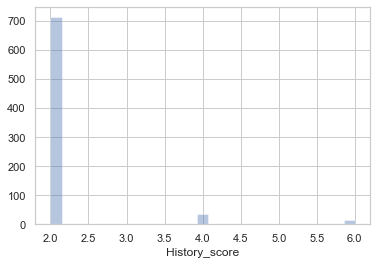

In [41]:
for i, col in enumerate(merged.columns):
    if (merged[col].dtype == float) | (merged[col].dtype == int):
        plt.figure(i)  
        sns.distplot(merged[col], kde=False)

### Categorical Variables

#### Statistical

In [33]:
for i, col in enumerate(merged.columns):
    if (merged[col].dtype == object):
        print(col,"\n",merged[col].describe(),"\n","counts","\n",merged[col].value_counts())
        

LOCATION_ID 
 count     763
unique     45
top         8
freq       74
Name: LOCATION_ID, dtype: object 
 counts 
 8     74
19    68
16    51
9     51
12    44
5     43
2     40
4     37
13    35
6     33
15    33
32    29
11    26
22    24
29    21
14    20
18    16
31    12
1     11
37    10
39     9
28     8
21     8
27     7
43     7
25     6
20     5
38     4
30     4
36     4
7      4
40     3
3      3
35     2
41     1
45     1
23     1
33     1
24     1
26     1
44     1
17     1
10     1
42     1
34     1
Name: LOCATION_ID, dtype: int64
Risk 
 count           763
unique            2
top       Not Fraud
freq            459
Name: Risk, dtype: object 
 counts 
 Not Fraud    459
Fraud        304
Name: Risk, dtype: int64


#### Visual

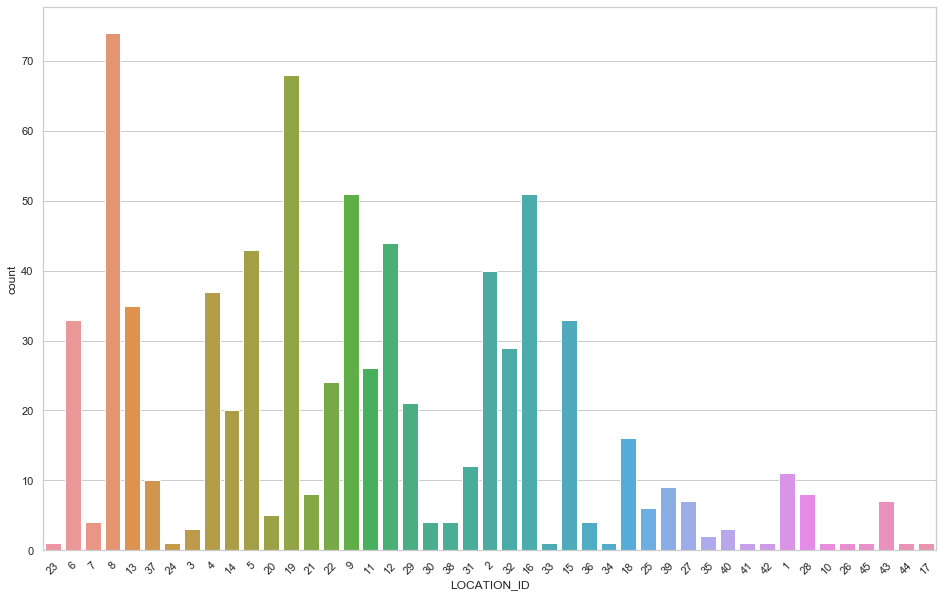

<Figure size 1152x720 with 0 Axes>

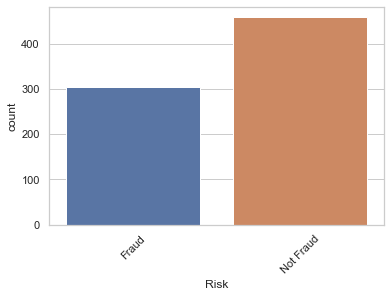

In [34]:
#sns.set(style="whitegrid")
for i, col in enumerate(merged.columns):
    if (merged[col].dtype == object) :
        plt.figure(figsize=(16,10))
        plt.figure(i)
    #sns.distplot(df1[col])
        sns.countplot(x=merged[col],data=merged)
        plt.xticks(rotation=45)


### Observation:
#### Not Fraud Firms are higher than Fraud Firms.
#### Out of 45 cities, maximum firms on which risk analysis was done is city 8.

In [35]:
merged['Risk'].value_counts()

Not Fraud    459
Fraud        304
Name: Risk, dtype: int64

/Volumes/MacintoshHD/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Volumes/MacintoshHD/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

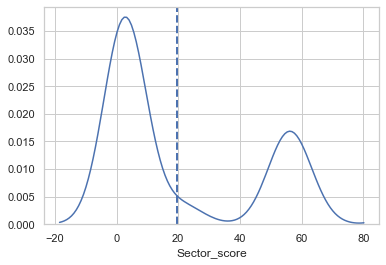

<Figure size 432x288 with 0 Axes>

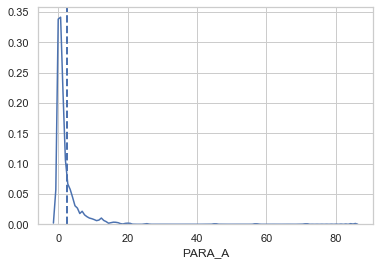

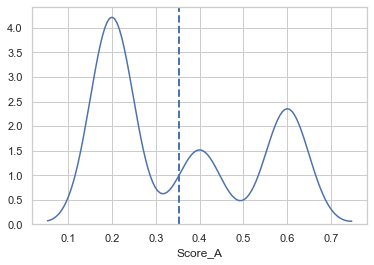

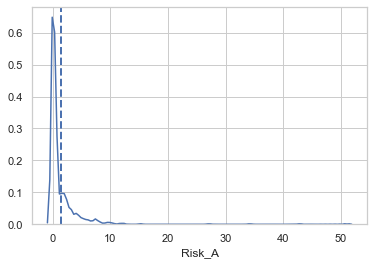

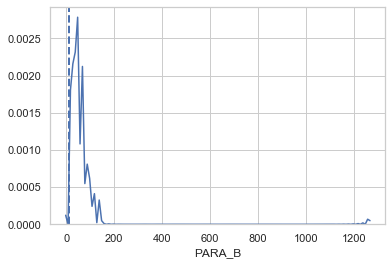

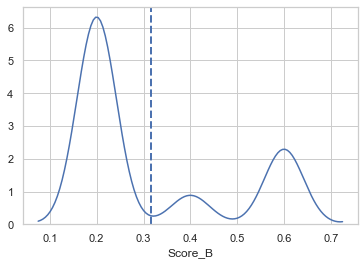

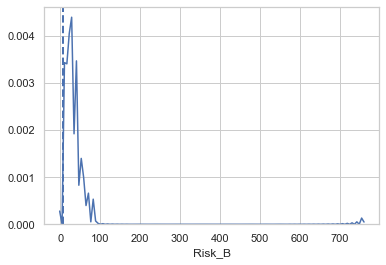

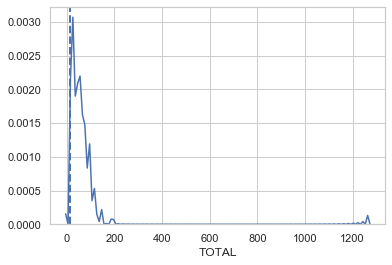

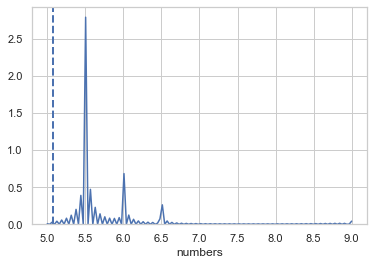

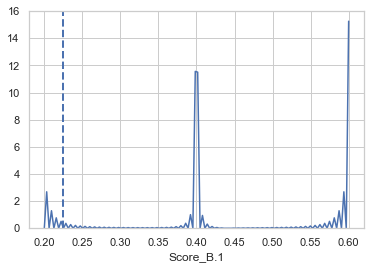

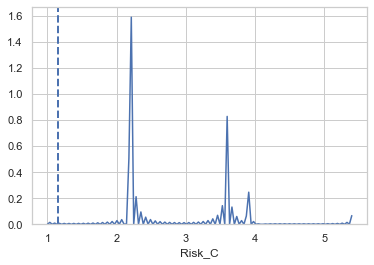

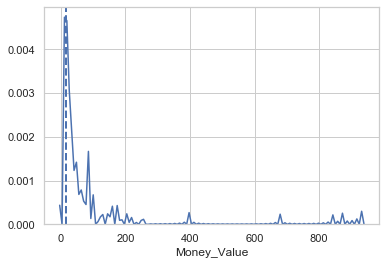

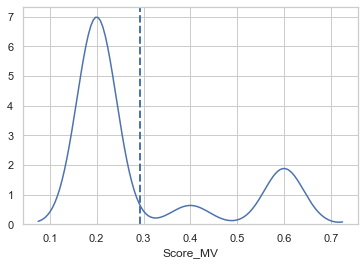

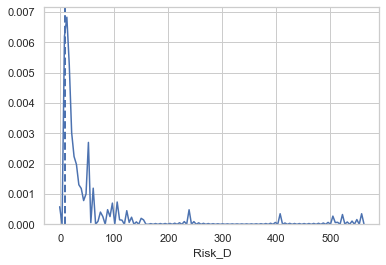

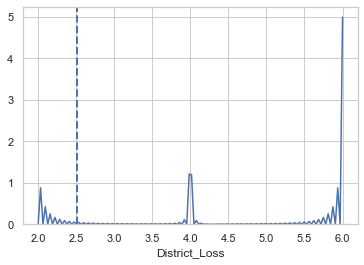

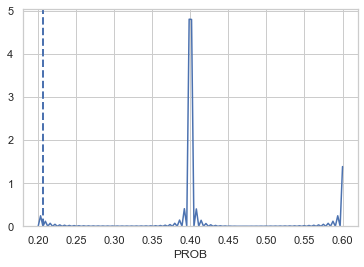

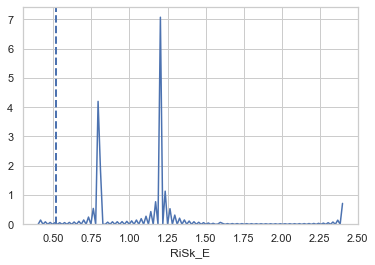

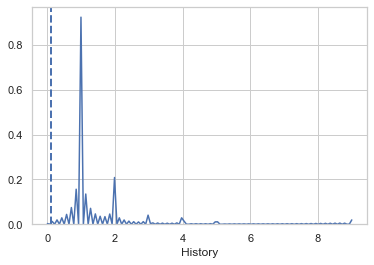

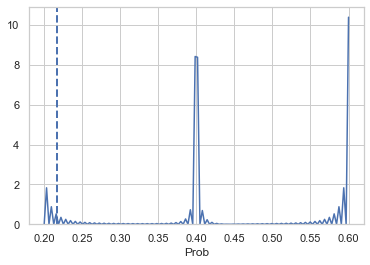

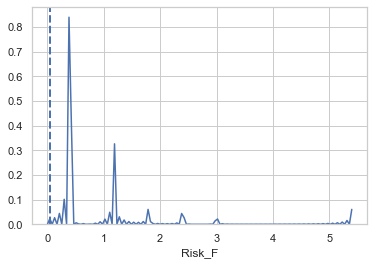

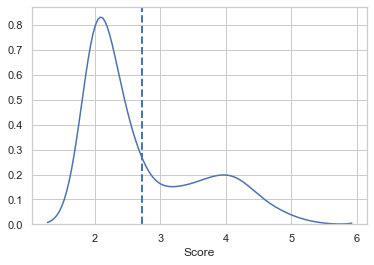

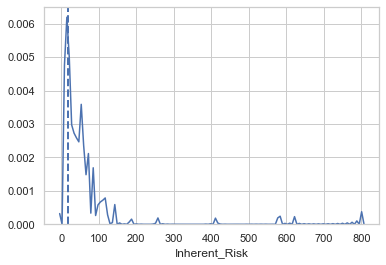

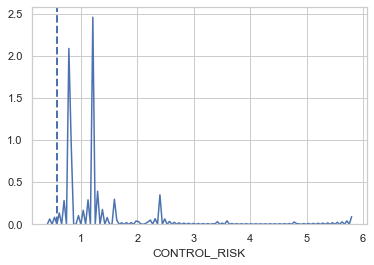

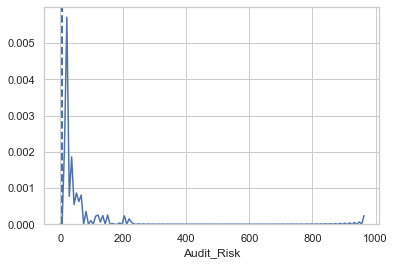

<Figure size 432x288 with 0 Axes>

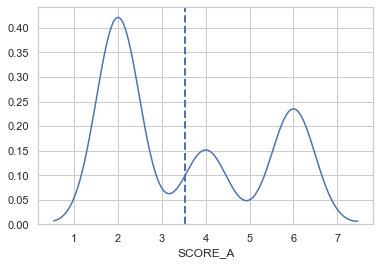

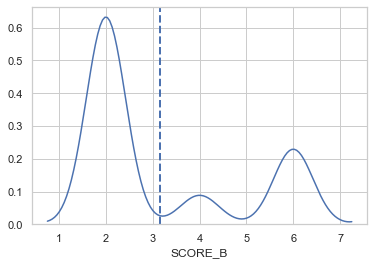

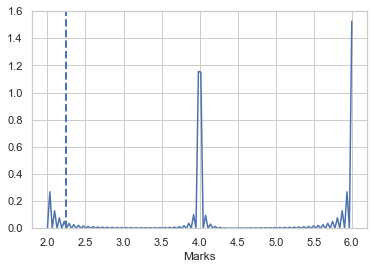

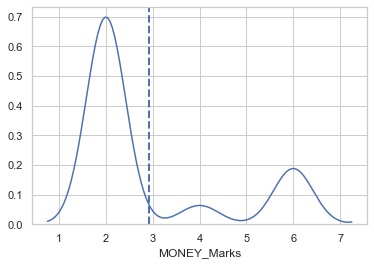

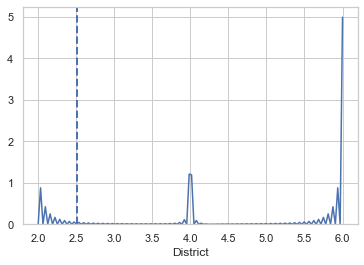

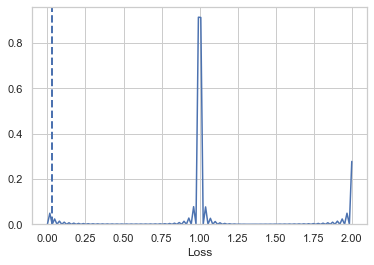

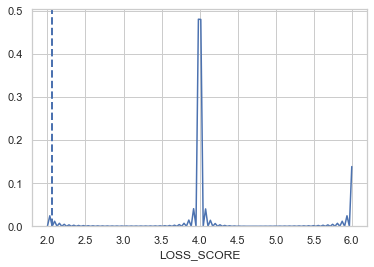

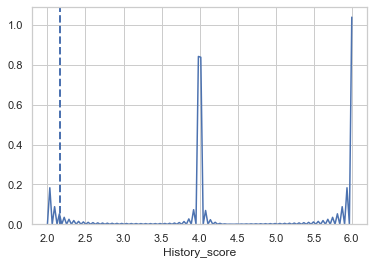

In [36]:
#fig, axes = plt.subplots(5,5, figsize=(12, 12))
for i, col in enumerate(merged.columns):
    if (merged[col].dtype == float) | (merged[col].dtype == int):
        plt.figure(i)
        plt.figure(figsize=(6,4))
        sns.distplot(merged[col],hist=False)
        plt.axvline(merged[col].mean(), color='b', linestyle='dashed', linewidth=2)

In [37]:
#skewness = 0 : normally distributed.
#skewness > 0 : the data are positively skewed or right skewed
#skewness < 0 : the data are negatively skewed or skewed left, meaning that the left tail is longer.
import scipy
from scipy.stats import skew 
columns = ['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score']
scipy.stats.skew(merged[columns], axis=0, bias=True)

array([ 0.81305428,  8.43665683,  0.4640772 ,  8.28409316, 20.33947092,
        0.93251517, 20.30673875, 19.08215099,  6.67105144,  3.51181334,
        3.94867296, 10.42881306,  1.26934379, 10.41862803,  2.2148076 ,
        6.48851412,  2.99851189,  9.17888606,  4.29801239, 10.28365895,
        1.0305178 ,  9.08111193,  5.12793938,  0.4640772 ,  0.93251517,
        3.51181334,  1.26934379,  2.2148076 ,  6.67394032,  6.48851412,
        4.29801239])

#### From the above graph, we can say that the datapoints of the feature may not have a gaussian distribution as the datapoints do not lie around the mean of that feature.

## Bivariate Analysis

### Continuous-Categorical Variables

#### Statistical

In [109]:
# One Way F-test(Anova) :- It tell whether two or more groups are similar or not based on their mean similarity 
#and f-score.
#https://towardsdatascience.com/1-way-anova-from-scratch-dissecting-the-anova-table-with-a-worked-example-170f4f2e58ad
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('Sector_score ~ Risk',data=merged).fit()
table = sm.stats.anova_lm(lm)
print(table)

#p-value for significance is -> PR
#if p<0.05:
#    print("reject null hypothesis") -> An alternative hypothesis is one that states there is a statistically significant relationship between two variables.
#else:
#    print("accept null hypothesis") -> A null hypothesis is a hypothesis that says there is no statistical significance between the two variables.->No correlation between variables 

             df         sum_sq       mean_sq           F        PR(>F)
Risk        1.0   67947.482793  67947.482793  137.587052  2.527700e-29
Residual  761.0  375820.497896    493.850851         NaN           NaN


### Observation:
#### p-value < 0.05 
### Inference:
#### We reject the null hypothesis in favor of the alternative: this means that at least one group mean (sector_score mean for fraud is different from sector_score mean for no fraud) is significantly different, i.e., there is a correlation between these 2 variables

#### Visual

##### Target variable is Risk (categorical)

/Volumes/MacintoshHD/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


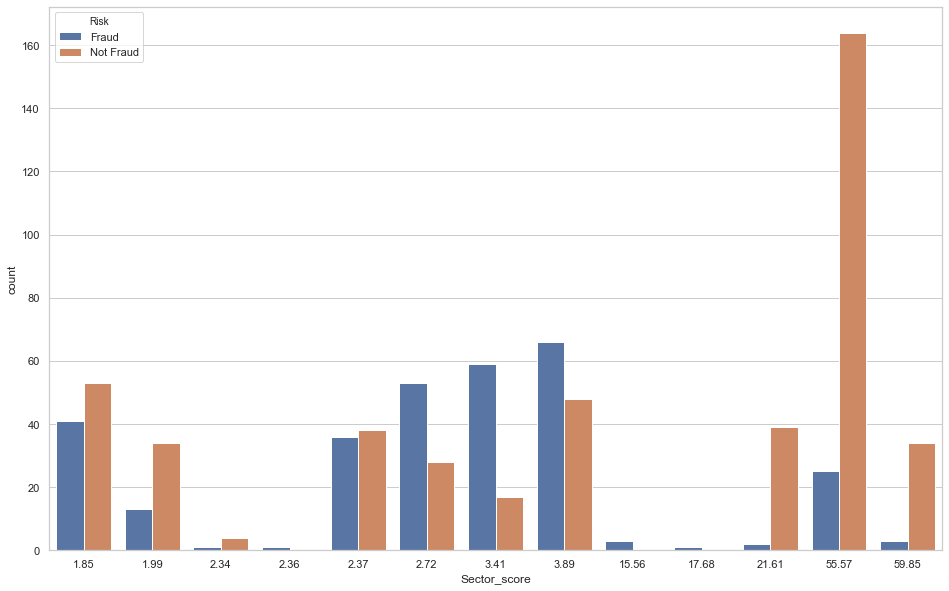

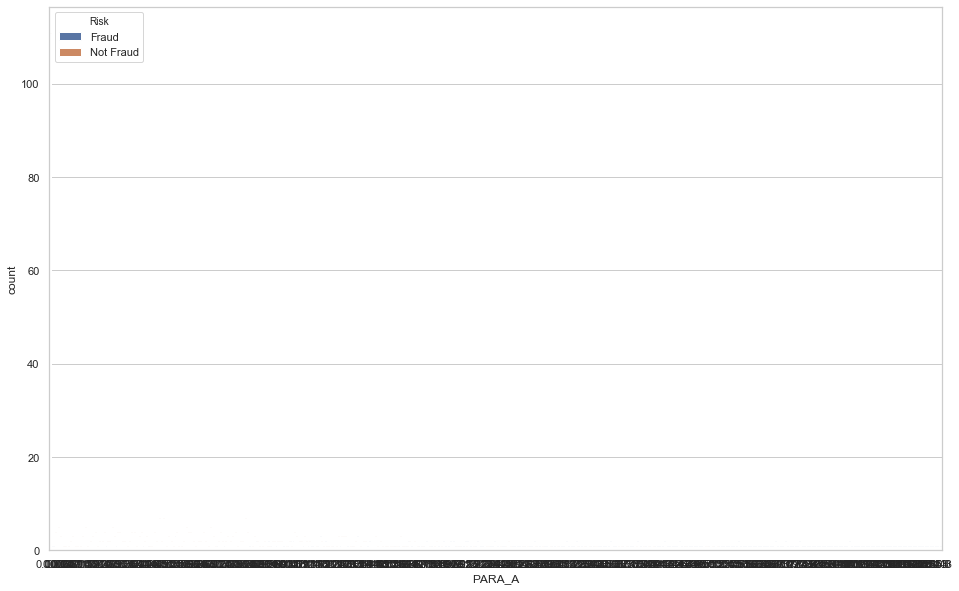

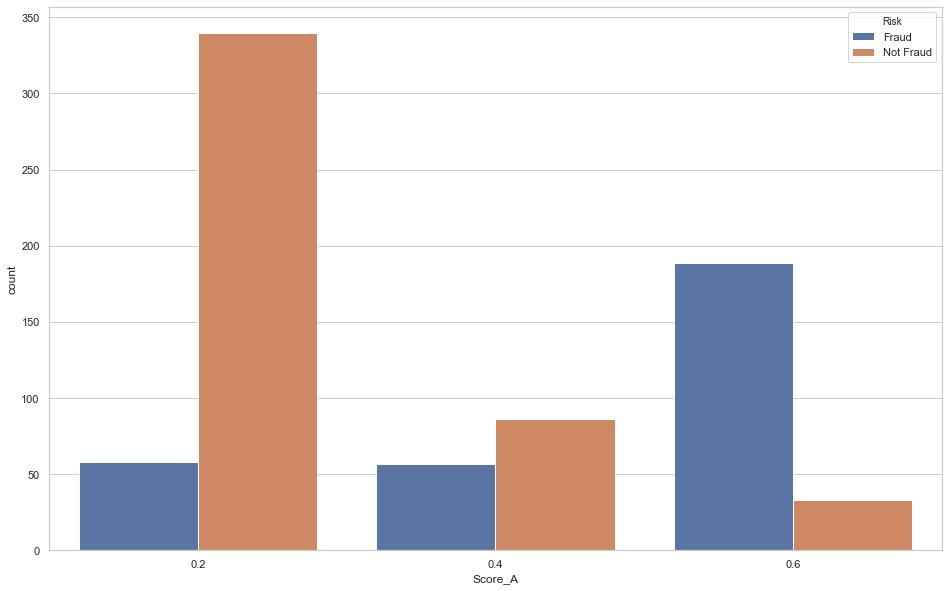

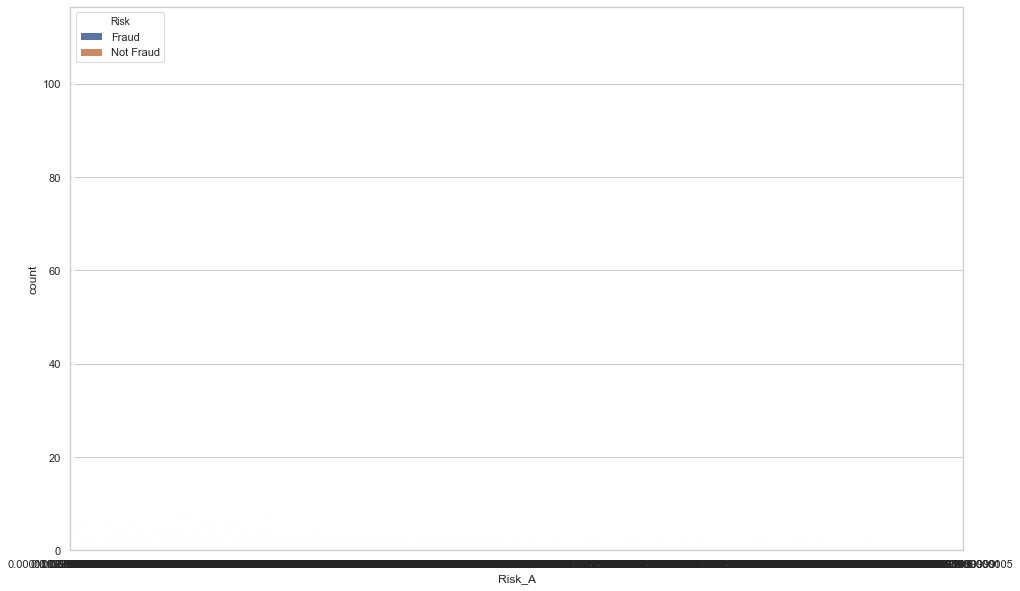

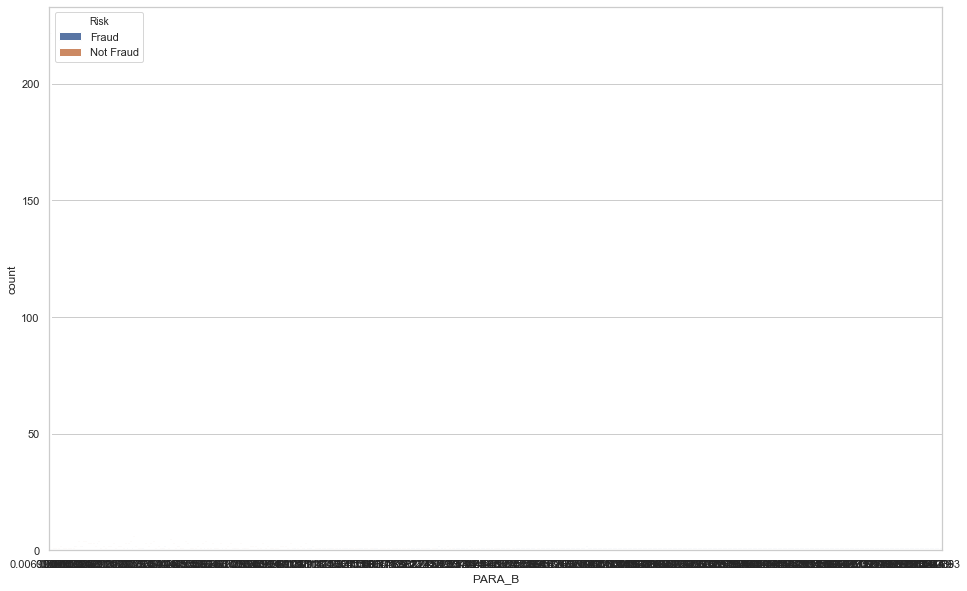

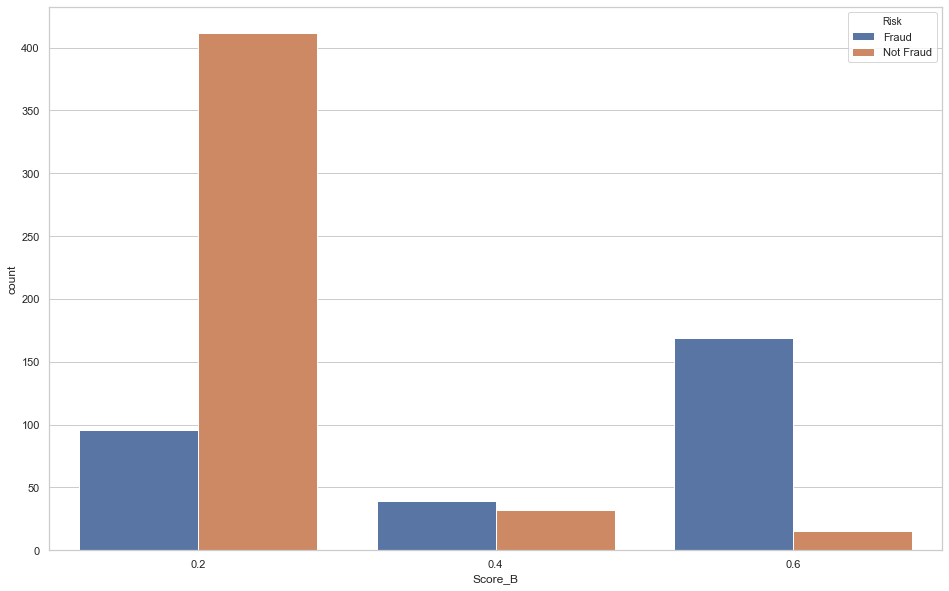

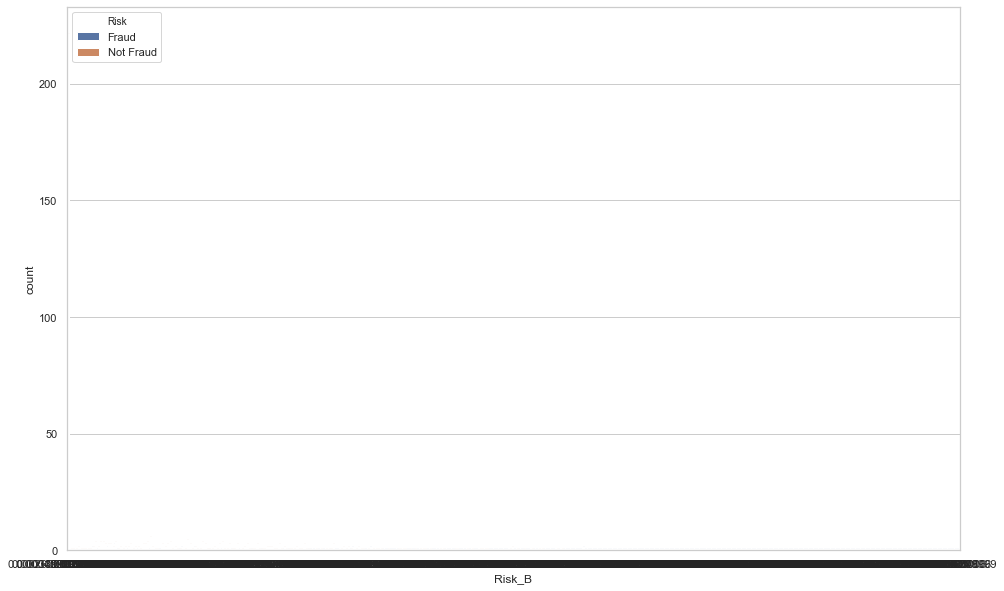

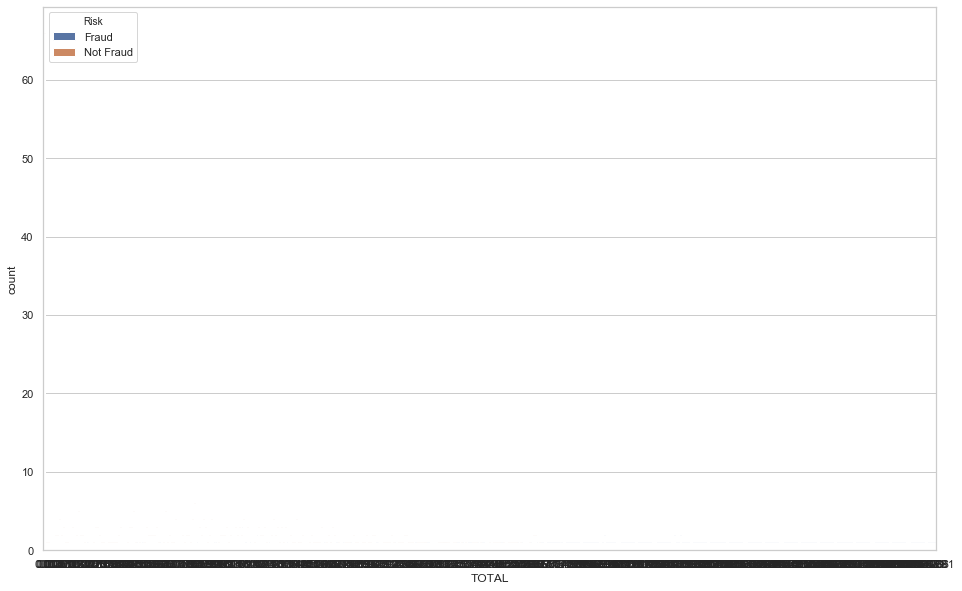

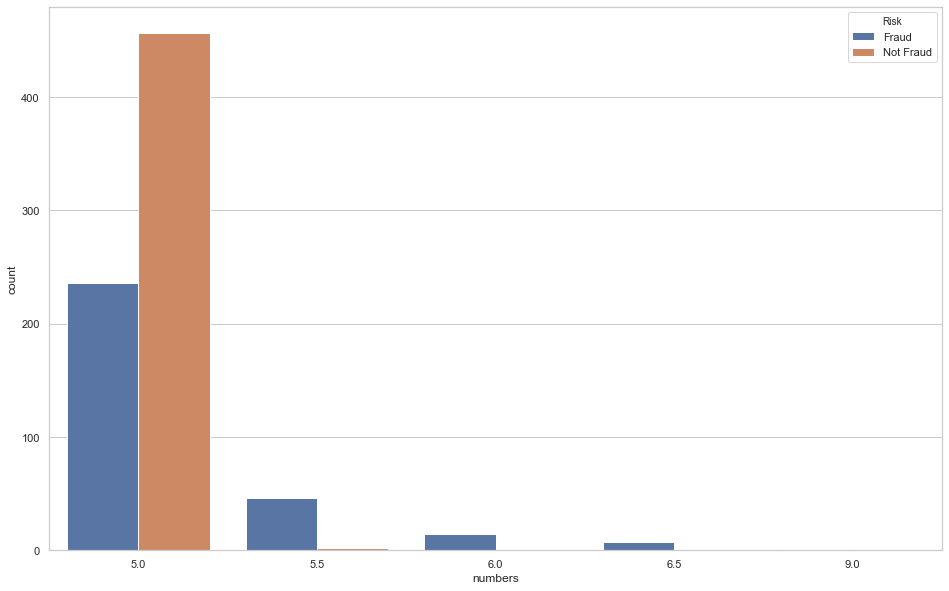

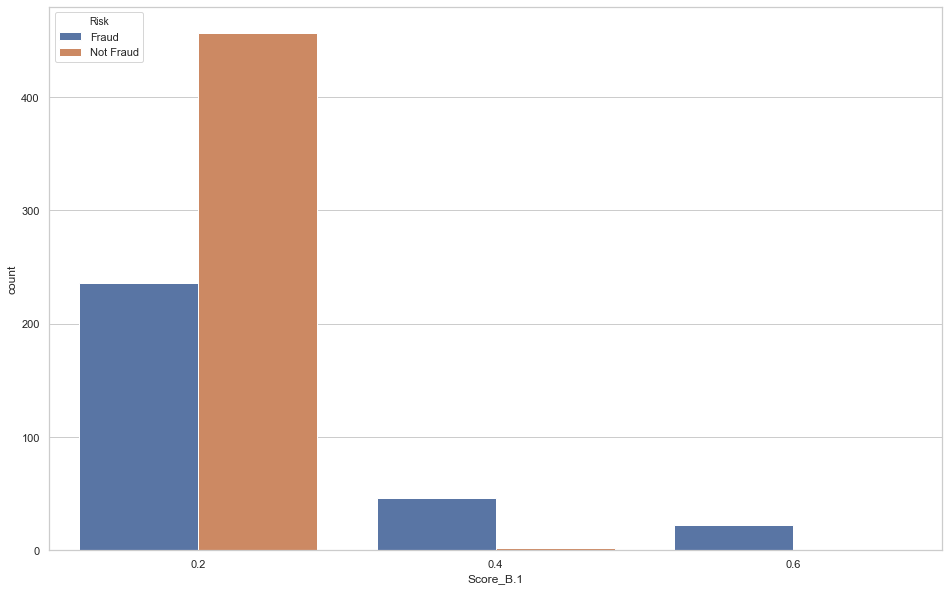

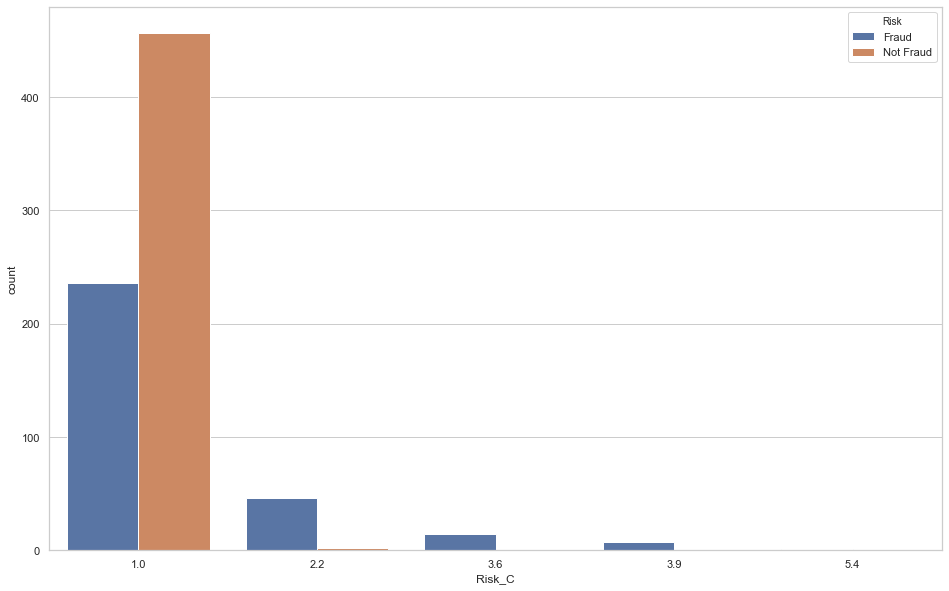

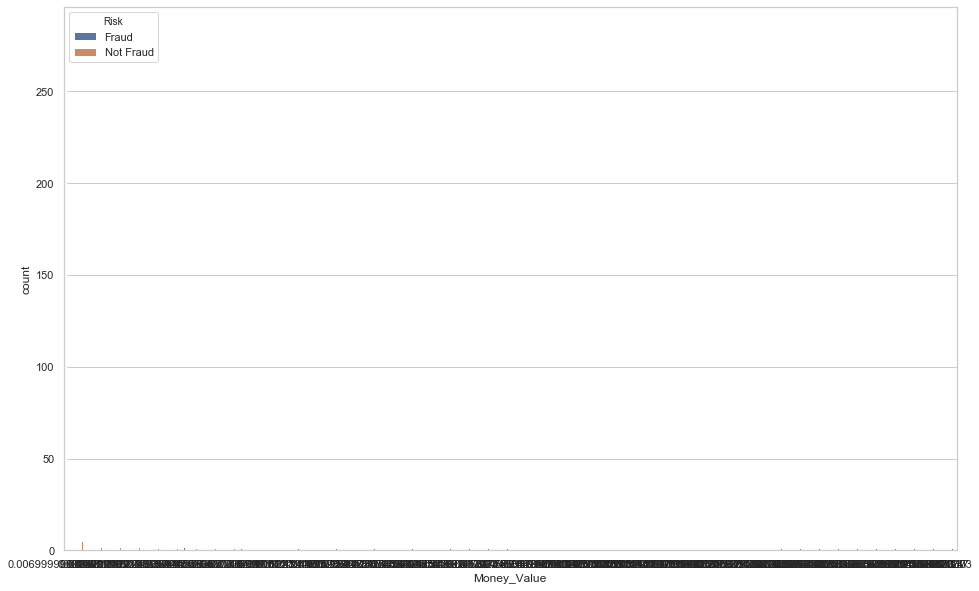

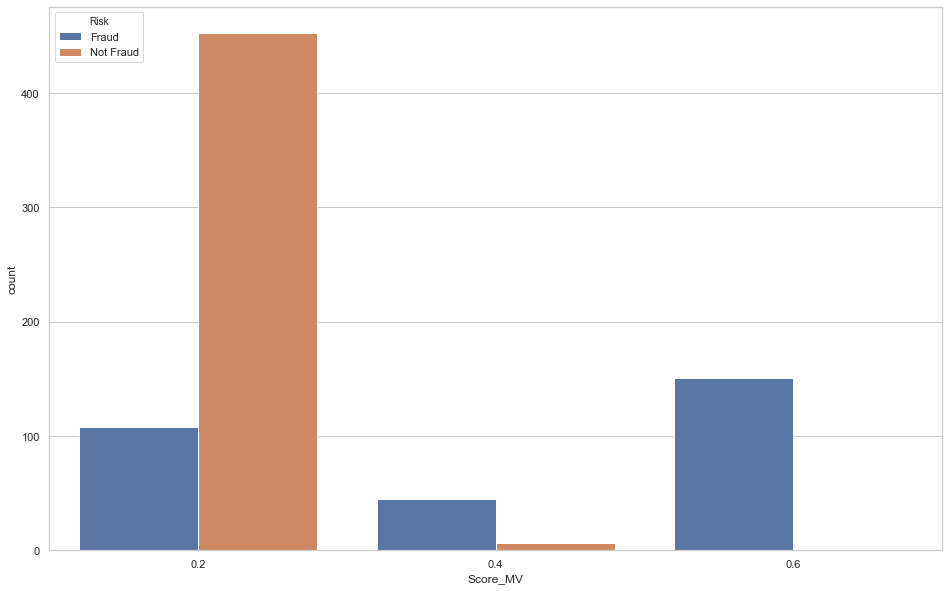

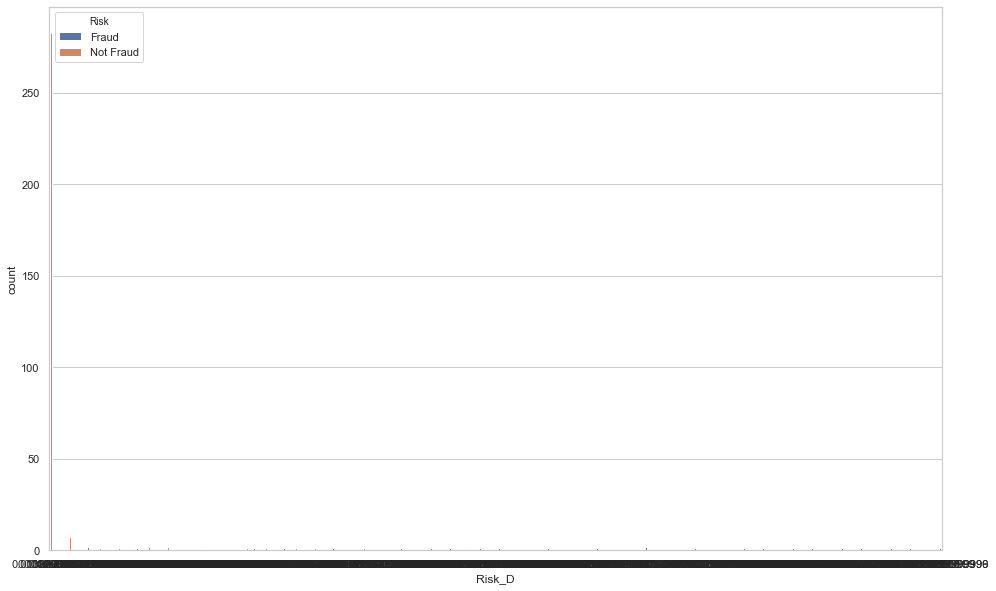

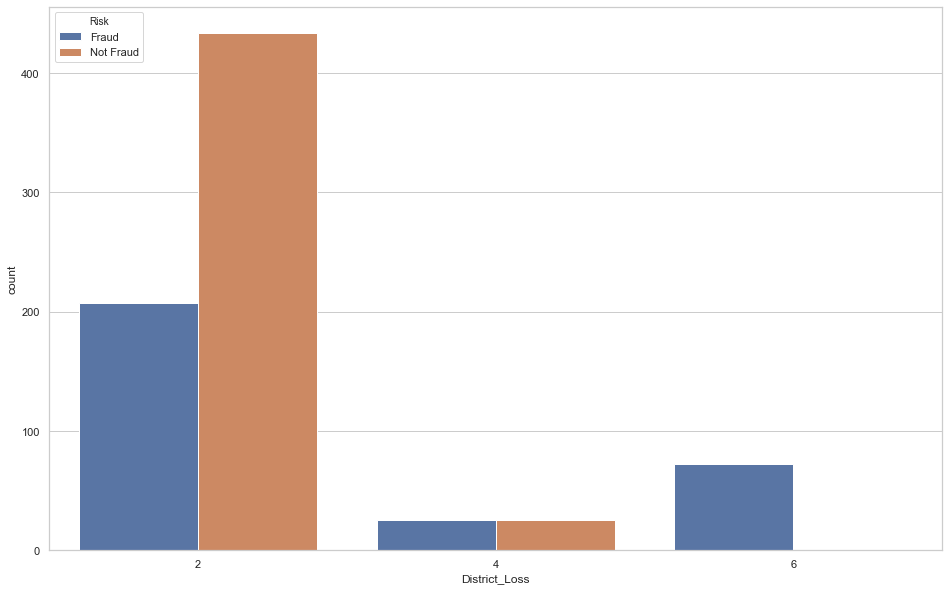

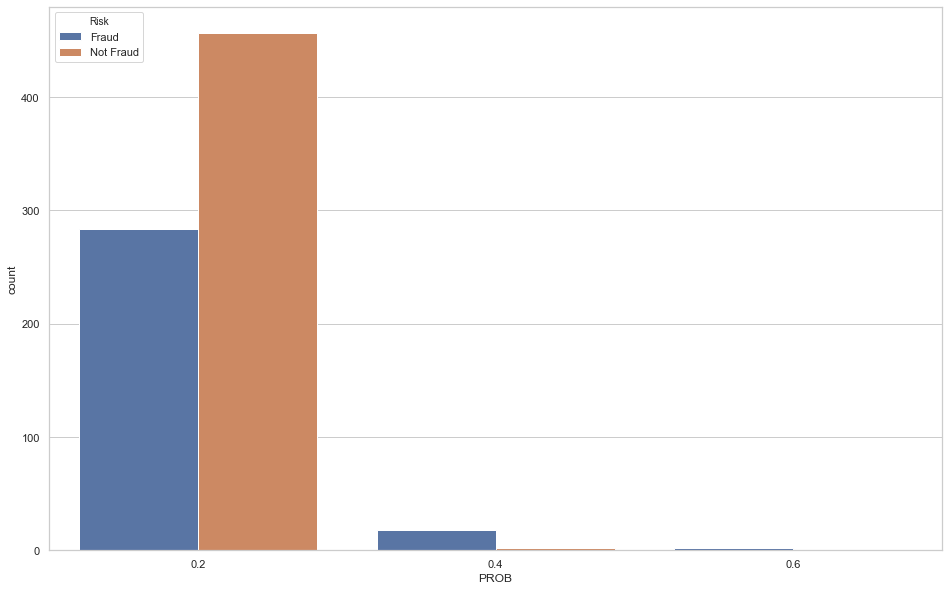

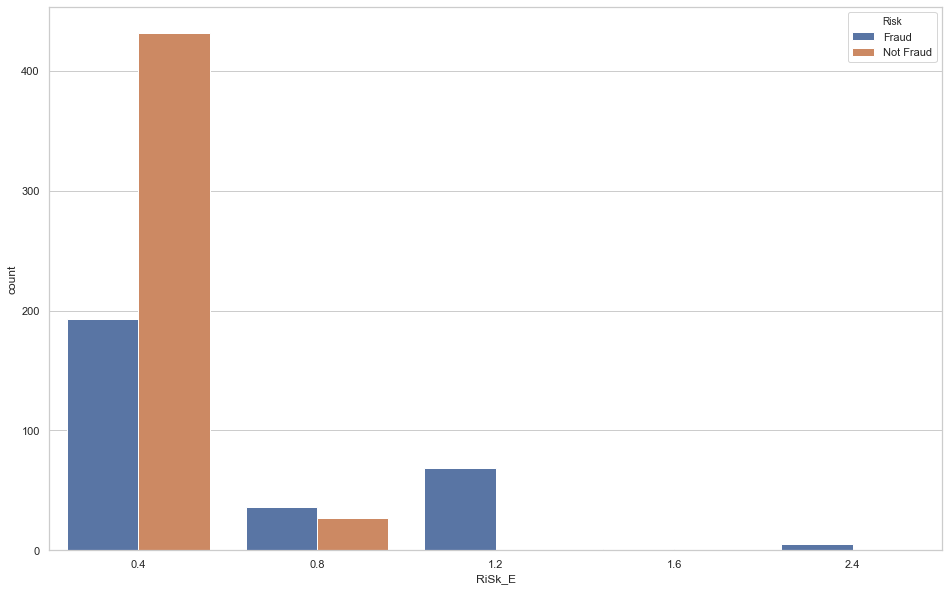

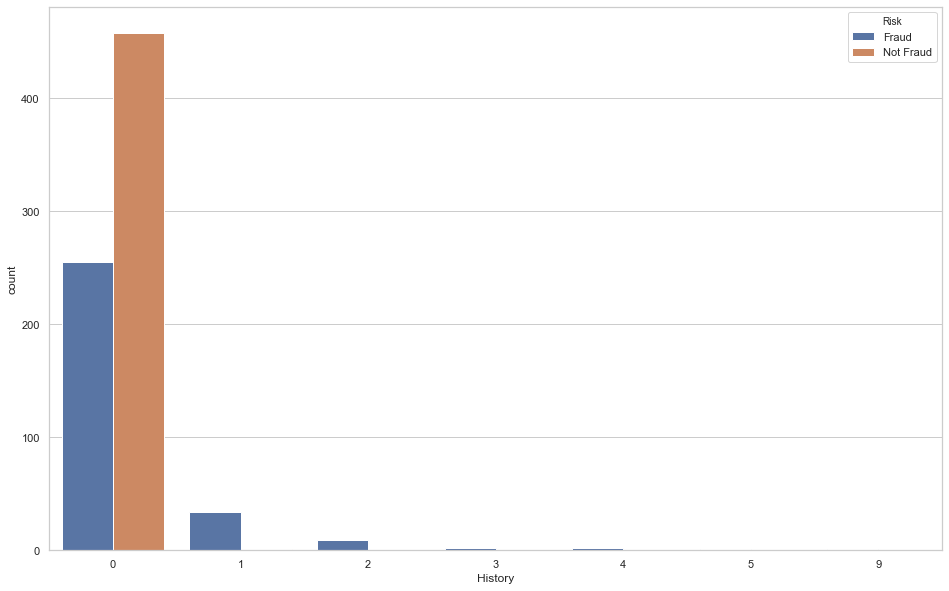

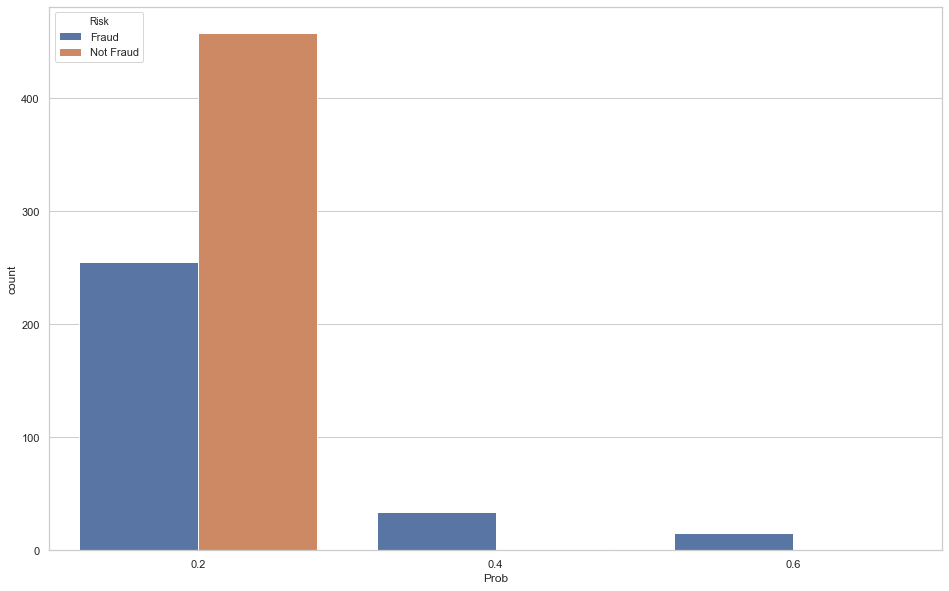

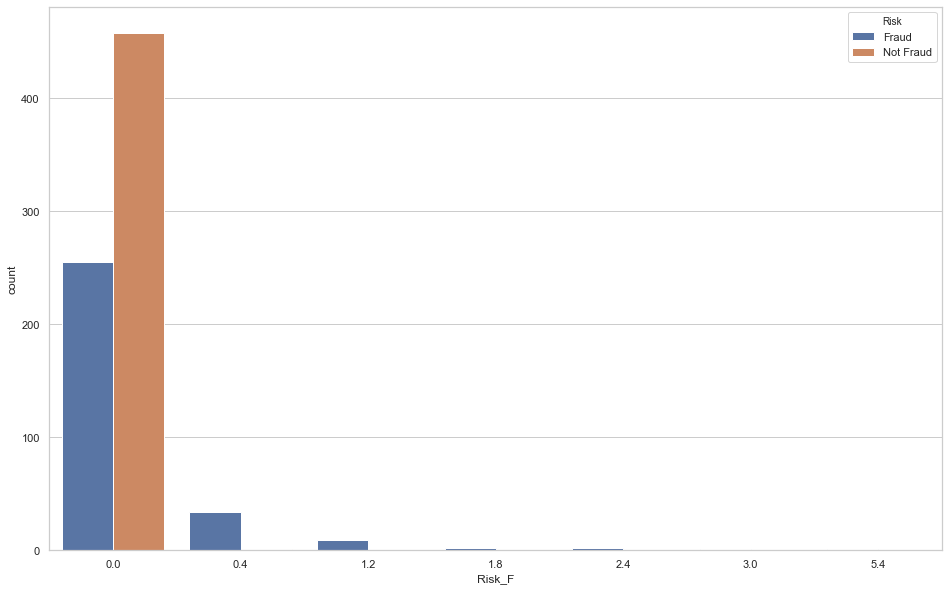

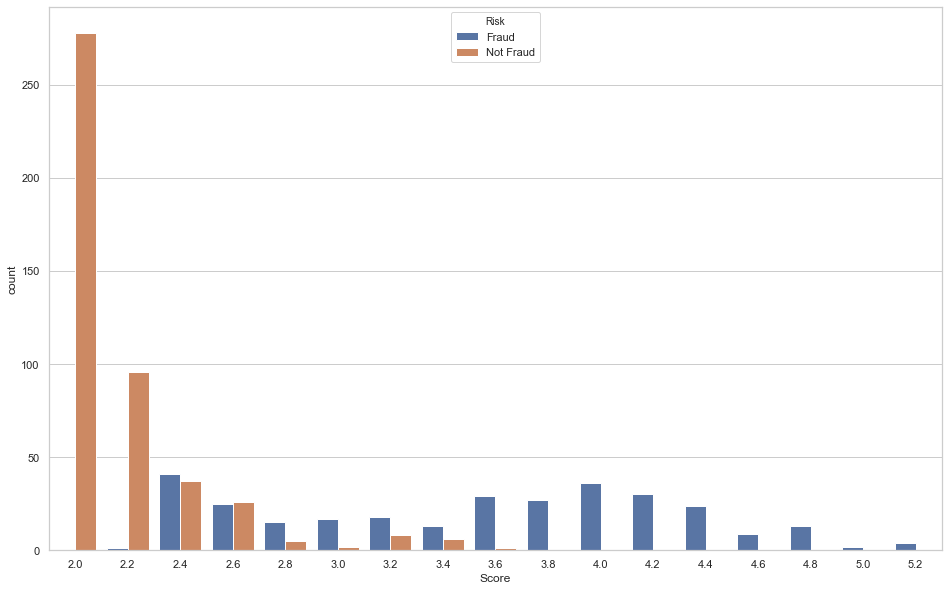

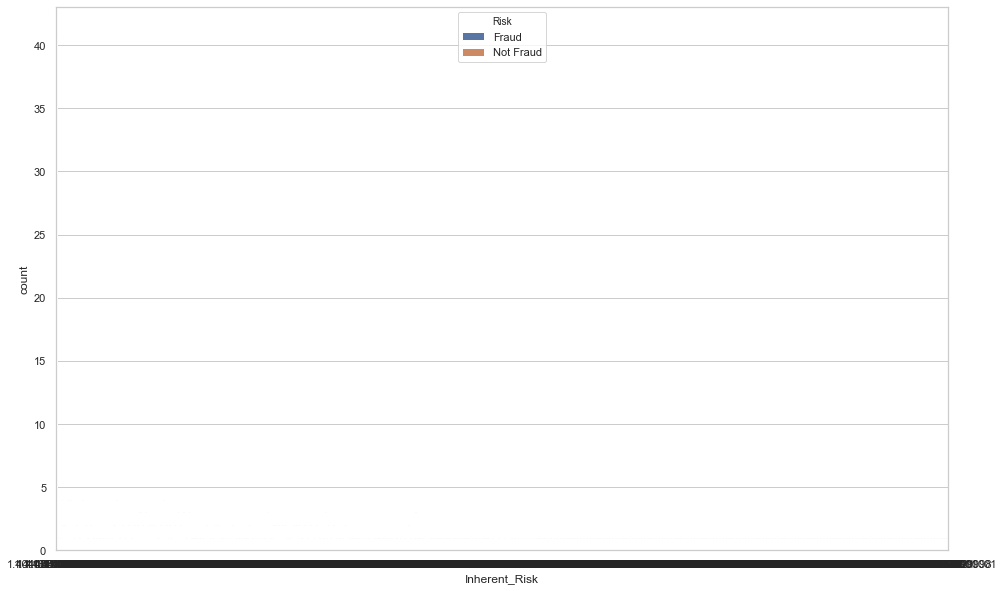

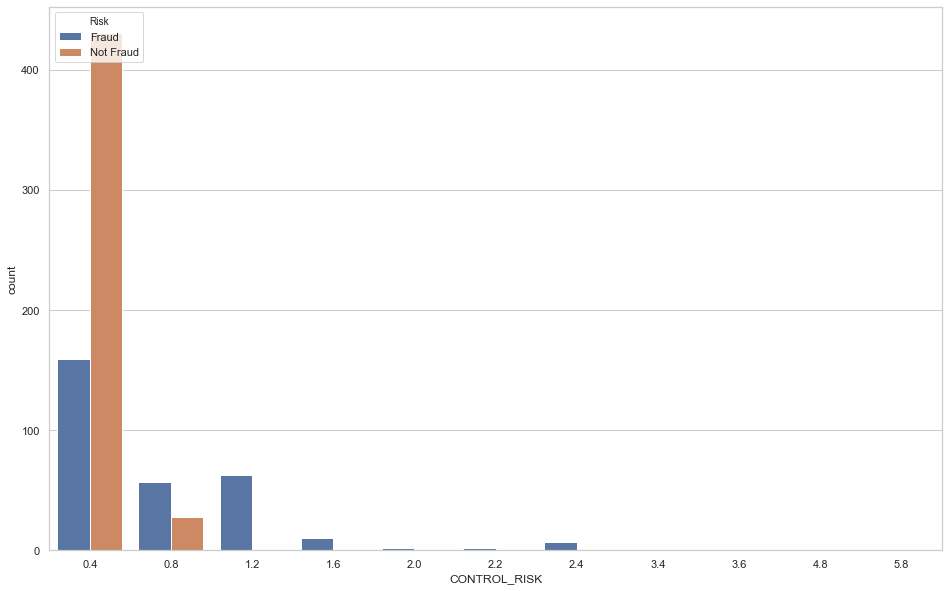

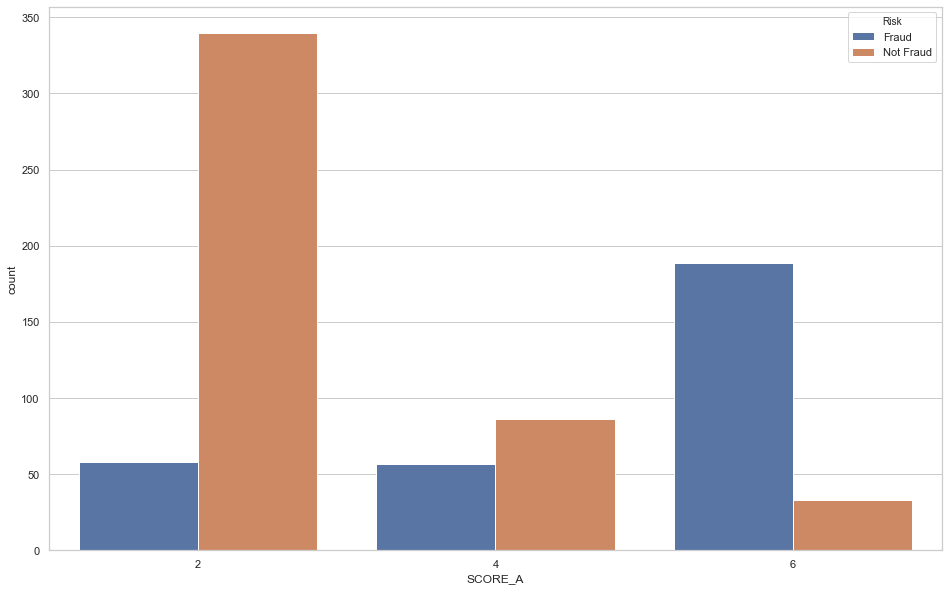

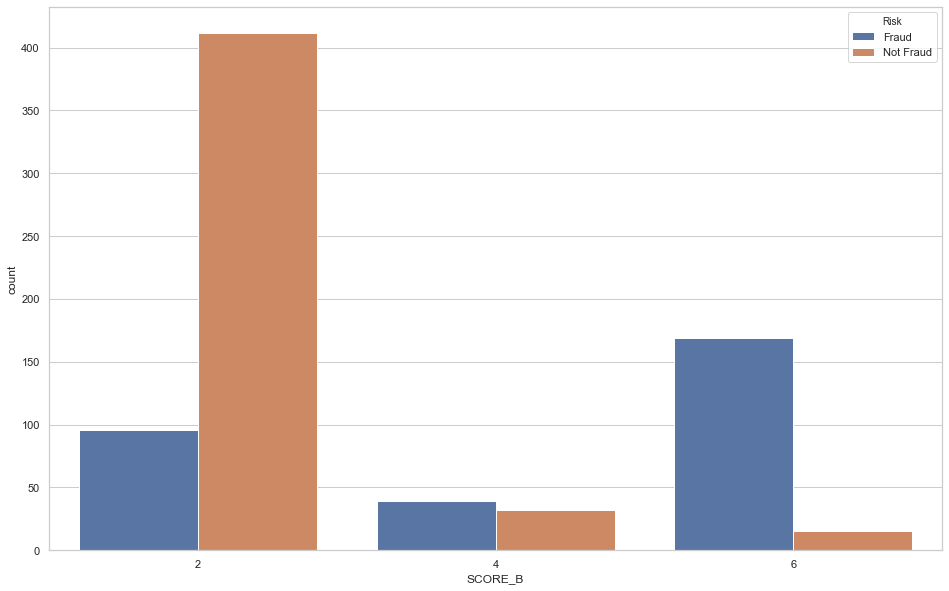

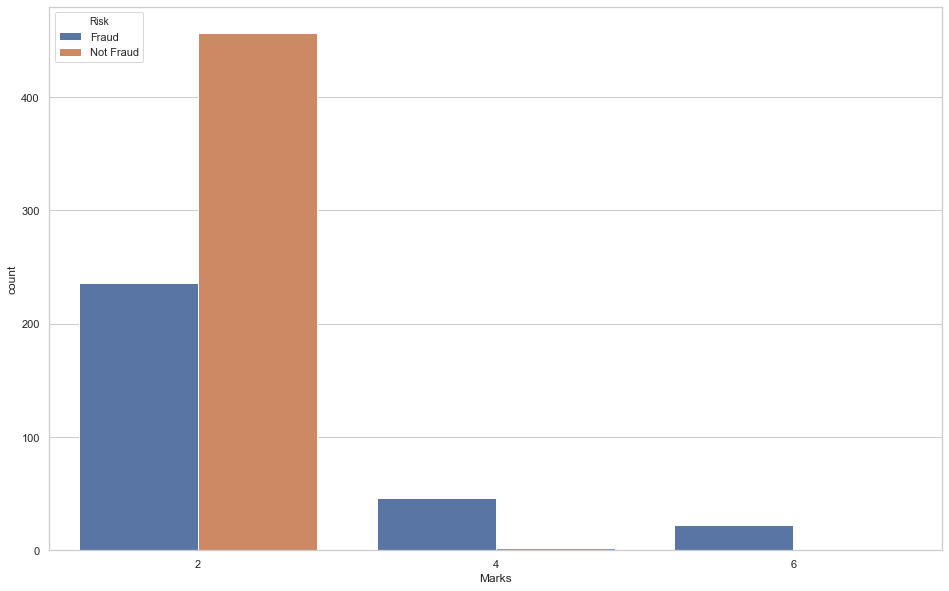

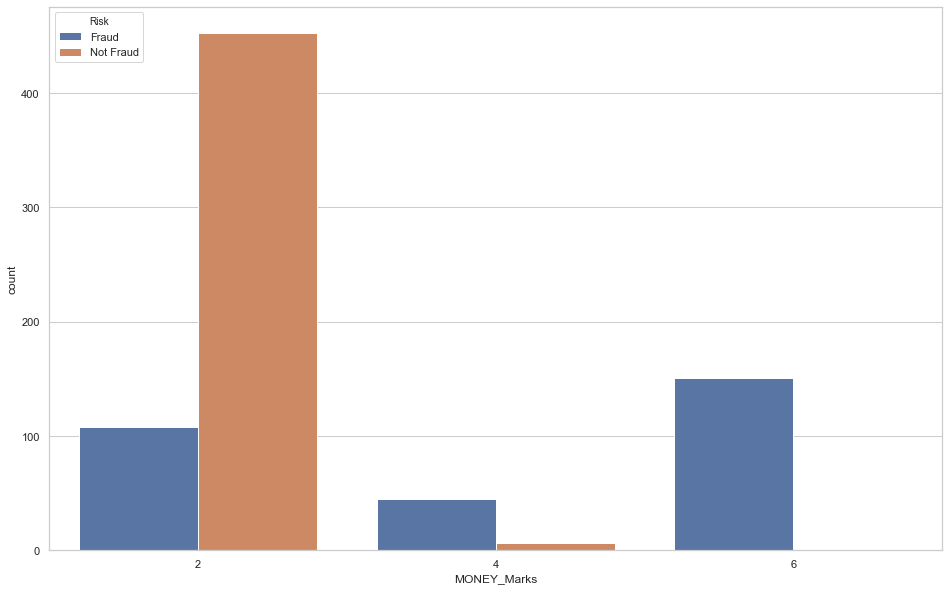

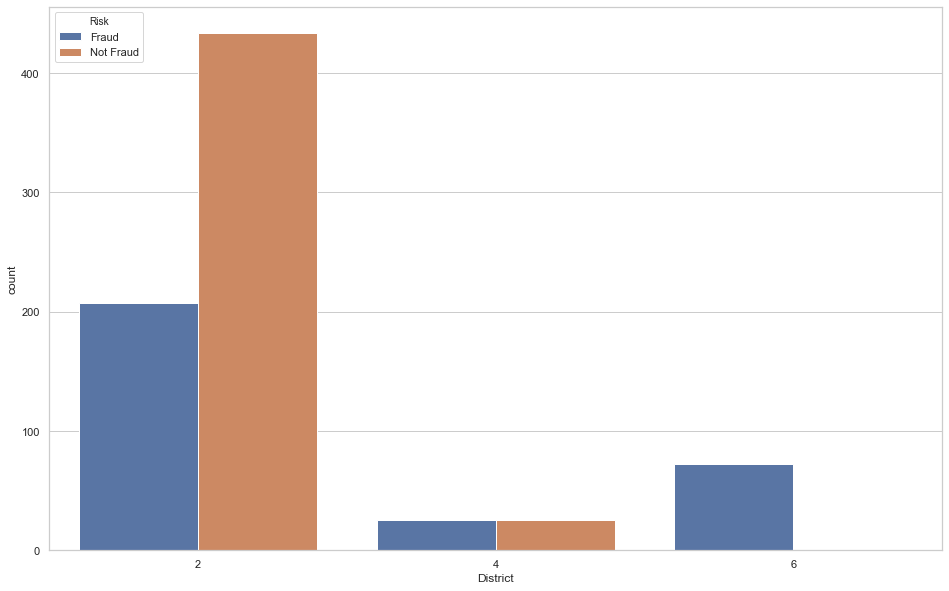

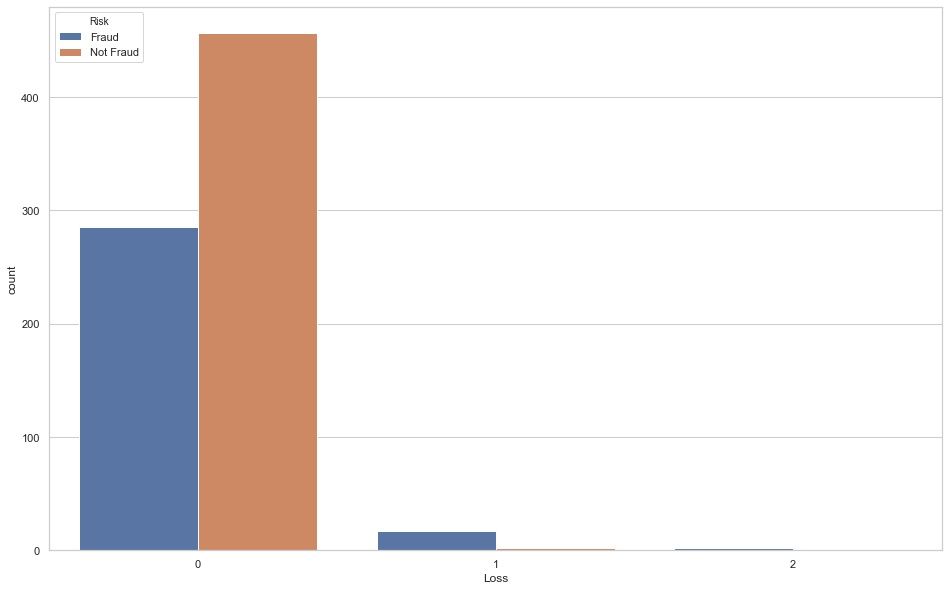

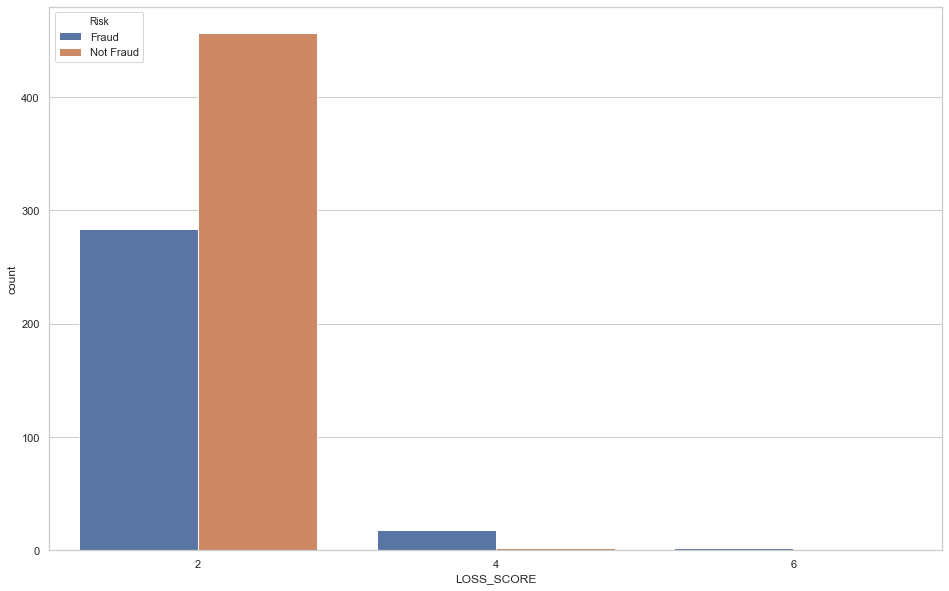

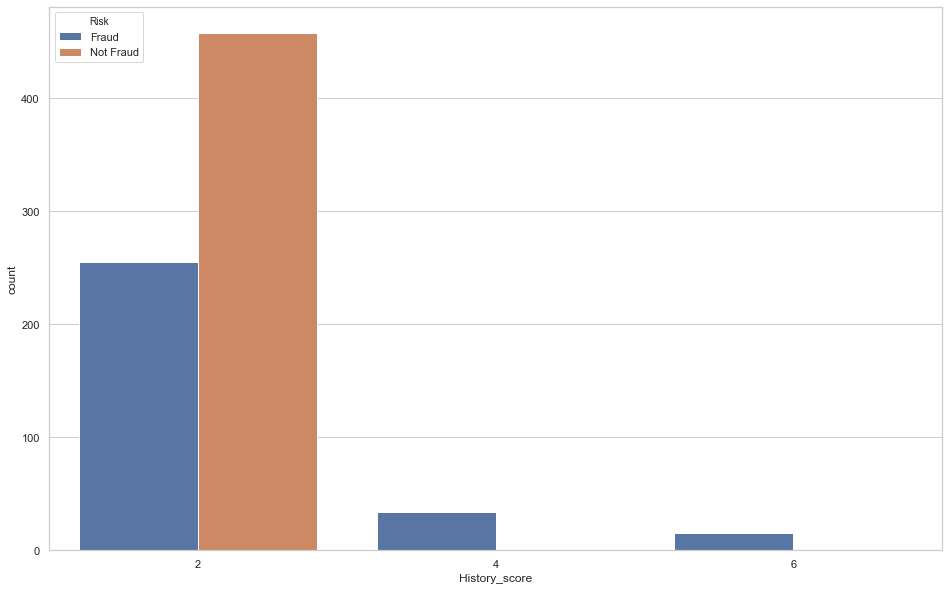

In [110]:
columns = ['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score']
for i in range(len(columns)):
    plt.figure(figsize=(16,10))
    sns.countplot(x=columns[i],data=merged,hue="Risk")


### Observations:
#### 1. For zero average historical loss (history), the risk is less i.e., risk is zero(not fraud).
#### 2. District-loss (historical risk score in last 10 years) = 2 has less risk ( risk is zero)
#### 3. numbers is inconsistency in historical scores. Risk zero is concentrated in numbers= 5.

### Continuous-Continuous Variables

#### Statistical

#### Correlations of each features in Dataset

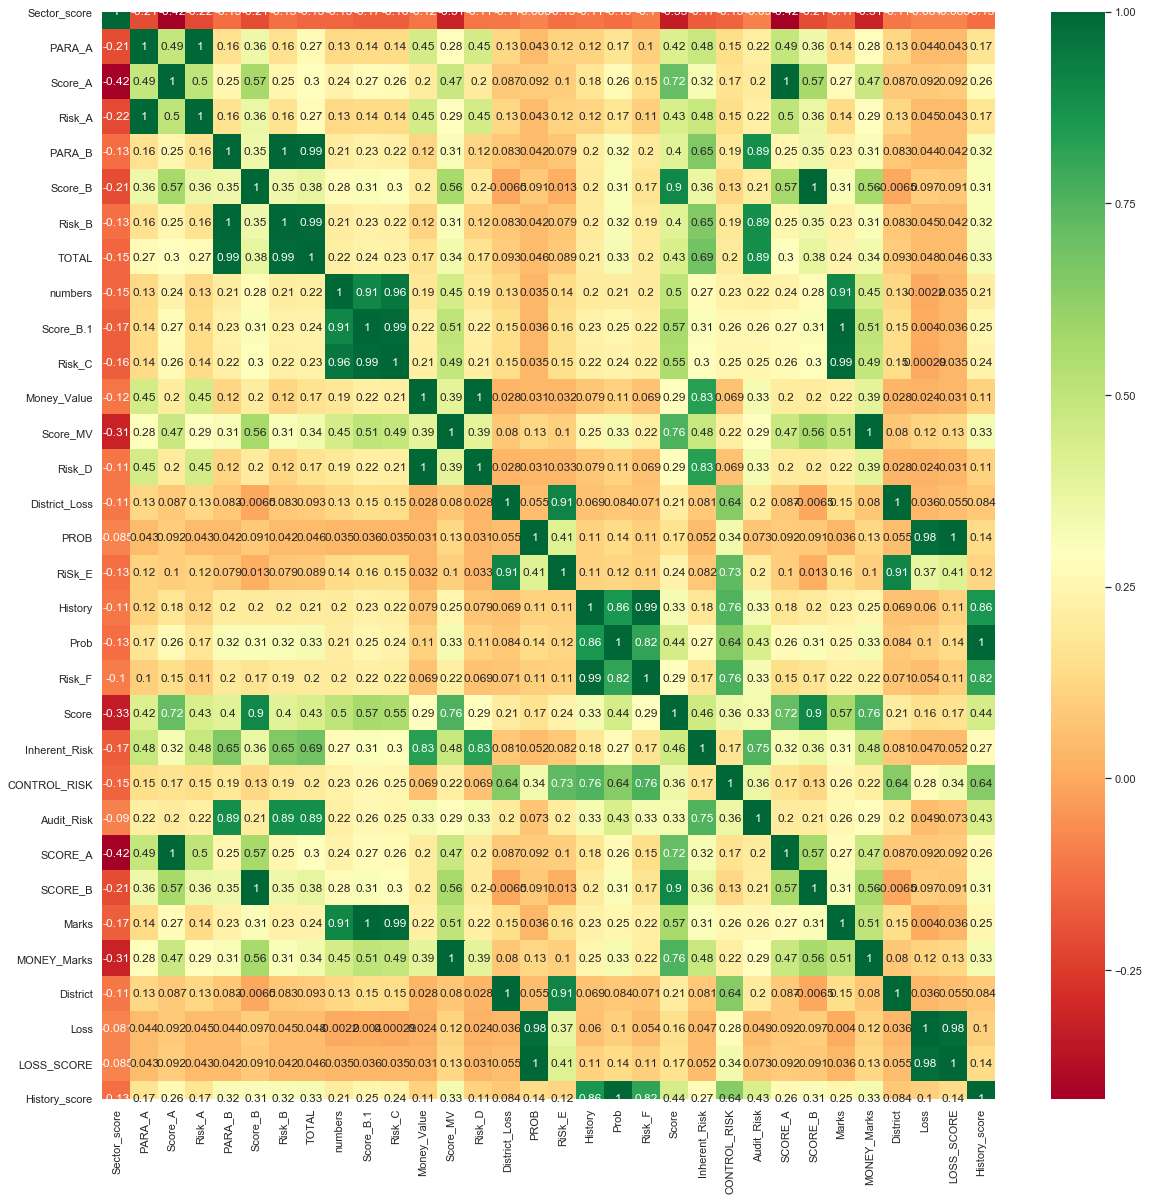

In [118]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = merged.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merged[top_corr_features].corr(),annot=True,cmap="RdYlGn")


#### After looking at the correlation map, columns Risk_A, Risk_B, MONEY_Marks, Score_B.1, District, Prob, PROB, SCORE_A, SCORE_B are correlated with PARA_A, PARA_B, Score_MV, Marks, District_Loss, History_score, LOSS_SCORE, Score_A, Score_B with value of 1 respectively.

#### Spearman and Pearson Correlation Coefficient

#### Visual

#### Target variable is Audit_Risk (continuous)

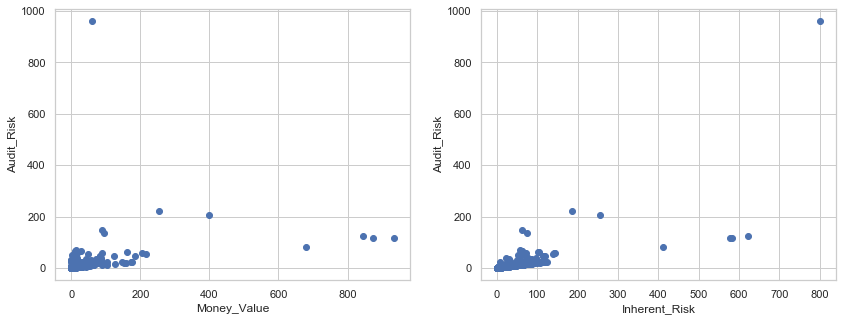

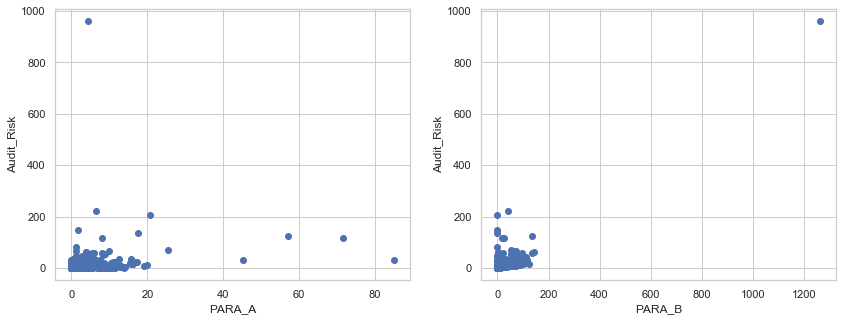

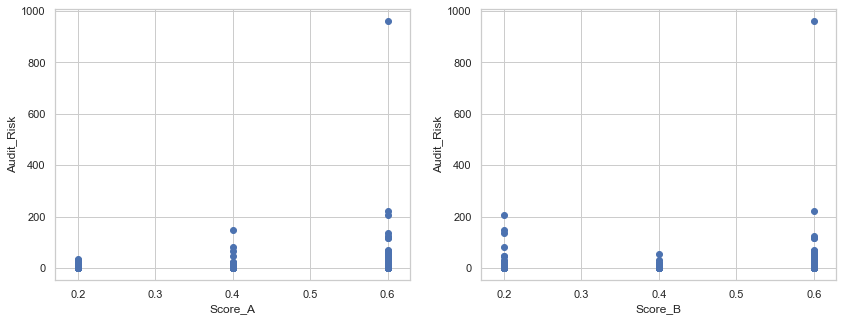

In [111]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(merged['Money_Value'], merged['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Money_Value')

plt.subplot(1,2,2)
plt.scatter(merged['Inherent_Risk'], merged['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Inherent_Risk')
plt.show()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(merged['PARA_A'], merged['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('PARA_A')

plt.subplot(1,2,2)
plt.scatter(merged['PARA_B'], merged['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('PARA_B')

plt.show()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(merged['Score_A'], merged['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Score_A')

plt.subplot(1,2,2)
plt.scatter(merged['Score_B'], merged['Audit_Risk'])
plt.ylabel('Audit_Risk')
plt.xlabel('Score_B')

plt.show()

#### Plotting scatter plot between these features with respect to our target variable Audit_Risk and we can confirm that there are outliers for those columns.
#### Looking at Audit_Risk vs Inherent_Risk (one instance), there seems to be outlier with around 800 inherent_risk score and a over 950 audit_risk score. A second point to notice is that most of our data are between 0 – 200 inherent_risk score and 0 – 200 audit_risk score, quite densely actually. Another interesting point we notice is the right-upwards trend of our data. So, the more inherent_risk score is, the more audit_risk score it tends to have, and more the risk would be!

### Categorical-Categorical Variables

#### Statistical

#### Chi-Square and Cramer's V

#### Visual

#### histogram, bargraph